In [1]:
# 1.1 – Installing Required Python Packages
# These packages cover deep learning, image processing, data analysis, and visualization tasks

!pip install tensorflow scikit-learn opencv-python pillow tqdm matplotlib seaborn joblib psutil platformdirs natsort xgboost --quiet

print("Packages installed successfully.")

Packages installed successfully.


In [2]:
# 1.2 – Import Required Libraries
# Import all required libraries for data handling, image processing, ML/DL, and visualization

# Standard Libraries
import os
import sys
import platform
import subprocess
import cpuinfo
import math
from pathlib import Path
from datetime import datetime

# Numerical & Data Processing
import numpy as np
import pandas as pd
import joblib
import psutil

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Image Processing
import cv2
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Deep Learning (Keras / TensorFlow)
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet169, EfficientNetB0  # Pre-trained CNN models for feature extraction
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre
from tensorflow.keras.applications.densenet import preprocess_input as densenet_pre
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_pre

# Machine Learning (Scikit-learn and others)
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Utilities
from tqdm import tqdm
from IPython.display import Markdown, display

In [3]:
# 1.3 – Print Python/library versions and platform details for reference
# Useful for debugging and reproducibility

print("Python version       :", platform.python_version())
print("TensorFlow version   :", tf.__version__)
print("scikit-learn version :", sklearn.__version__)
print("OpenCV version       :", cv2.__version__)
print("PIL (Pillow) version :", Image.__version__)
print("Matplotlib version   :", matplotlib.__version__)
print("NumPy version        :", np.__version__)
print("Platform Info        :", platform.platform())
print("Architecture         :", platform.architecture())


Python version       : 3.12.7
TensorFlow version   : 2.19.0
scikit-learn version : 1.5.1
OpenCV version       : 4.11.0
PIL (Pillow) version : 10.4.0
Matplotlib version   : 3.9.2
NumPy version        : 1.26.4
Platform Info        : Windows-11-10.0.26100-SP0
Architecture         : ('64bit', 'WindowsPE')


In [4]:
# 1.4 – Prints system info (CPU, RAM, OS, CPU Name, and GPU if available)

def get_system_specs():
    print("System Specifications")
    print("-" * 40)
    
    # CPU Details
    print("\n[CPU Information]")
    cpu = cpuinfo.get_cpu_info()
    print(f"Processor Name      : {cpu['brand_raw']}")
    print(f"Physical Cores      : {psutil.cpu_count(logical=False)}")
    print(f"Logical Cores       : {psutil.cpu_count(logical=True)}")
    cpu_freq = psutil.cpu_freq()
    if cpu_freq:
        print(f"Max Frequency (MHz) : {cpu_freq.max:.2f}")
        print(f"Current Frequency   : {cpu_freq.current:.2f}")

    # RAM Details
    ram = psutil.virtual_memory()
    print("\n[Memory (RAM)]")
    print(f"Total RAM (GB)      : {ram.total / (1024 ** 3):.2f}")
    print(f"Available RAM (GB)  : {ram.available / (1024 ** 3):.2f}")
    print(f"RAM Usage (%)       : {ram.percent}%")

    # OS Details
    print("\n[Operating System]")
    print(f"System              : {platform.system()} {platform.release()}")
    print(f"Machine Architecture: {platform.machine()}")

    # GPU Details
    print("\n[GPU Information]")
    try:
        gpu_info = subprocess.check_output(['nvidia-smi'], encoding='utf-8')
        print("NVIDIA GPU Detected:\n")
        print(gpu_info)
    except:
        print("No NVIDIA GPU detected or 'nvidia-smi' not available.")

# Run the function
get_system_specs()


System Specifications
----------------------------------------

[CPU Information]
Processor Name      : 12th Gen Intel(R) Core(TM) i7-1280P
Physical Cores      : 14
Logical Cores       : 20
Max Frequency (MHz) : 2000.00
Current Frequency   : 2000.00

[Memory (RAM)]
Total RAM (GB)      : 15.71
Available RAM (GB)  : 5.92
RAM Usage (%)       : 62.3%

[Operating System]
System              : Windows 11
Machine Architecture: AMD64

[GPU Information]
No NVIDIA GPU detected or 'nvidia-smi' not available.


In [5]:
# 1.5 – Log Execution Time for Any Processing Step
# Helper function to log how long a process took

def log_time(start, end, label="Execution"):
    duration = end - start
    print(f"{label} completed in {duration.total_seconds():.2f} seconds")

In [6]:
# 1.6 – Define and Create Core Project Directories
# Set up the folder structure for datasets, outputs, models, etc.

# Root directory
PROJECT_ROOT = Path("C:/Users/User/Desktop/implementation/implementation-code-tridccs-svm")

# Define main subdirectories
DATASETS_DIR   = PROJECT_ROOT / "datasets"
OUTPUTS_DIR    = PROJECT_ROOT / "outputs"
MODELS_DIR     = OUTPUTS_DIR / "models"
RESULTS_DIR    = OUTPUTS_DIR / "results"
VISUALS_DIR    = OUTPUTS_DIR / "visualizations"
PROCESSED_DIR  = OUTPUTS_DIR / "processed"  # For preprocessed features

# Create directories if missing
for path in [DATASETS_DIR, OUTPUTS_DIR, MODELS_DIR, RESULTS_DIR, VISUALS_DIR, PROCESSED_DIR]:
    path.mkdir(parents=True, exist_ok=True)

print("Project folders created and ready.")


Project folders created and ready.


In [7]:
# 2.1 – Load and resize images from dataset folders (one folder per class)

def load_dataset_images(dataset_path, target_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted([d for d in os.listdir(dataset_path) if (dataset_path / d).is_dir()])
    label_map = {cls: idx for idx, cls in enumerate(class_names)}

    for cls in class_names:
        class_dir = dataset_path / cls
        for img_name in os.listdir(class_dir):
            img_path = class_dir / img_name
            try:
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img)
                images.append(img_array)
                labels.append(label_map[cls])
            except Exception as e:
                print(f"Warning: Failed to load {img_path} ({e})")

    return np.array(images), np.array(labels), class_names

# Load SIRI-WHU dataset
SIRI_DIR = DATASETS_DIR / "siri_whu"
X_siri, y_siri, class_names_siri = load_dataset_images(SIRI_DIR, target_size=(224, 224))

# Load UC Merced dataset
UC_DIR = DATASETS_DIR / "uc_merced"
X_uc, y_uc, class_names_uc = load_dataset_images(UC_DIR, target_size=(224, 224))

print("Datasets loaded successfully:")
print(f"SIRI-WHU dataset loaded: {X_siri.shape[0]} images, {len(class_names_siri)} classes")
print(f"UC Merced dataset loaded: {X_uc.shape[0]} images, {len(class_names_uc)} classes")


Datasets loaded successfully:
SIRI-WHU dataset loaded: 2400 images, 12 classes
UC Merced dataset loaded: 2100 images, 21 classes


In [8]:
# 2.2 – Remove Invalid Images from Dataset
# Check dataset folders and delete unreadable or too-small images

def remove_invalid_images(dataset_path, class_names, min_dim=100):
    print(f"\nChecking and removing invalid or small images in {dataset_path.name}...")
    removed = 0
    for cls in class_names:
        cls_path = dataset_path / cls
        for img_file in cls_path.glob("*"):
            try:
                img = cv2.imread(str(img_file))
                if img is None or img.shape[0] < min_dim or img.shape[1] < min_dim:
                    print(f"Deleted {img_file.name}")
                    img_file.unlink()
                    removed += 1
            except (OSError, cv2.error):
                continue
    print(f"Cleaning complete. {removed} files removed.")

# Apply the cleaning function to both datasets
remove_invalid_images(SIRI_DIR, class_names_siri)
remove_invalid_images(UC_DIR, class_names_uc)


Checking and removing invalid or small images in siri_whu...
Cleaning complete. 0 files removed.

Checking and removing invalid or small images in uc_merced...
Cleaning complete. 0 files removed.


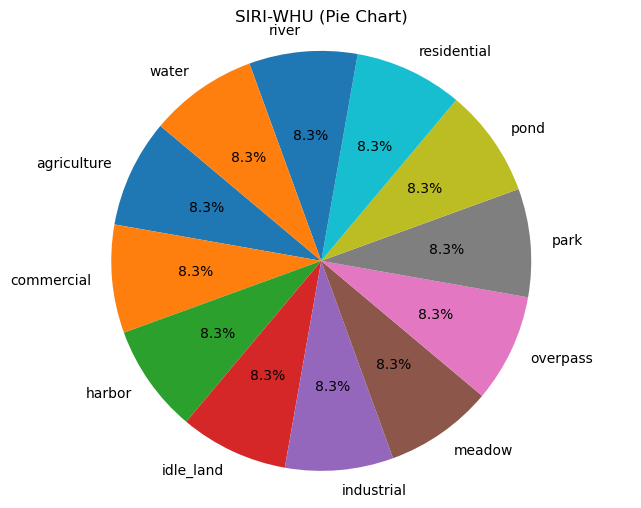

 Pie chart saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_pie_chart.png


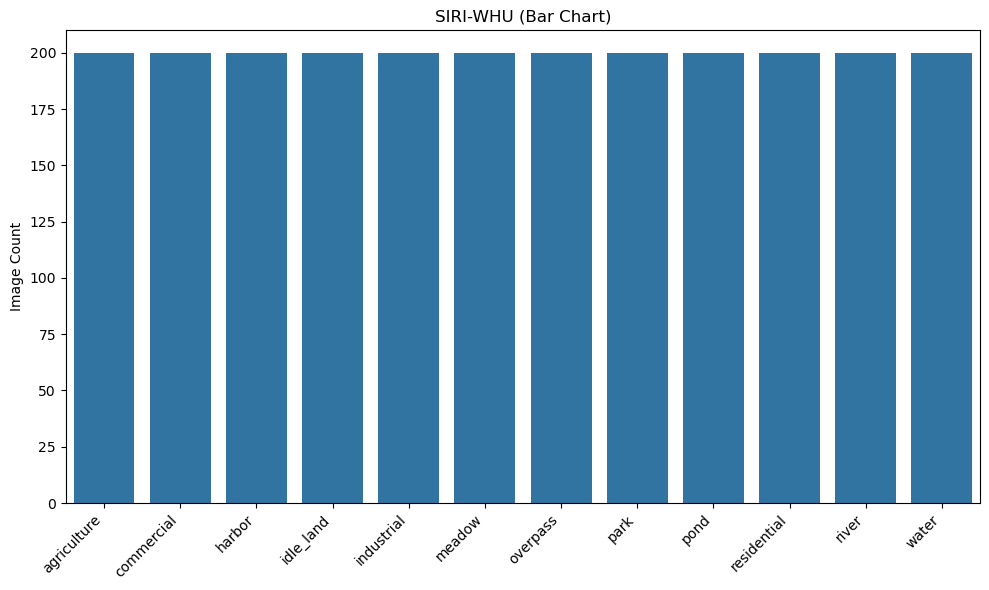

 Bar chart saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_bar_chart.png


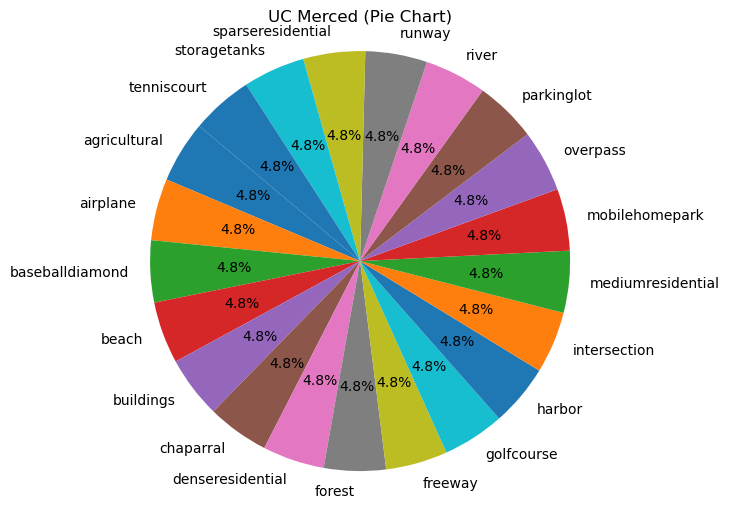

 Pie chart saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_pie_chart.png


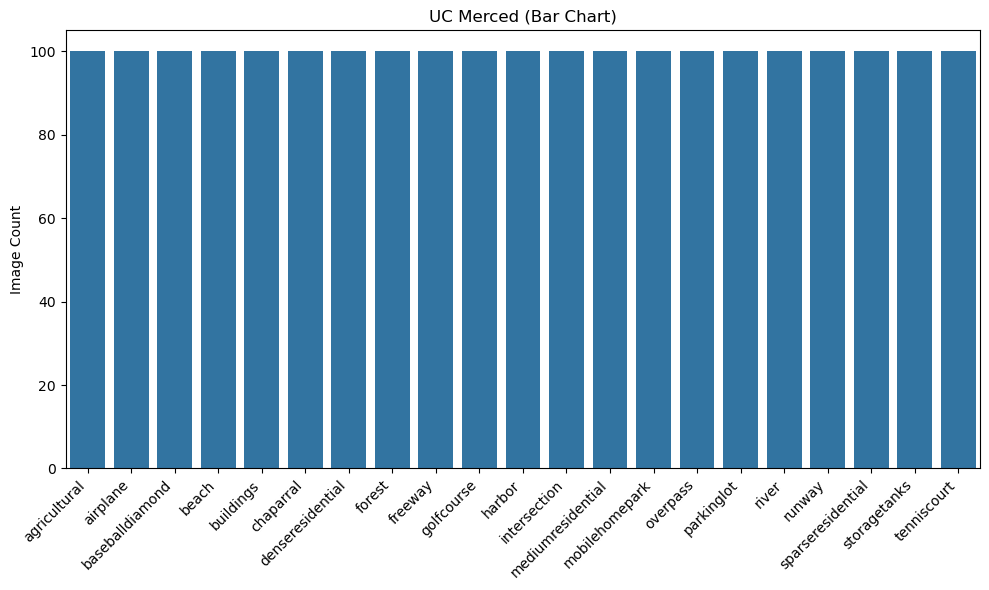

 Bar chart saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_bar_chart.png


In [9]:
# 2.3 – Visualize Class Distribution  (Pie & Bar Charts) 
# Show the number of images per class


def plot_pie_chart(dataset_path, title="Class Distribution", aug_suffix="_aug", save_path=None):
    from collections import defaultdict
    class_counts = defaultdict(int)

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        if not os.path.isdir(cls_path):
            continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith((".jpg", ".jpeg", ".png", ".tif")):
                label = cls + " (aug)" if aug_suffix in fname else cls
                class_counts[label] += 1

    if not class_counts:
        print(f"No valid images found in {dataset_path}")
        return

    labels, counts = zip(*class_counts.items())
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"{title} (Pie Chart)")
    plt.axis("equal")

    if save_path:
        save_file = save_path / f"{title.replace(' ', '_').lower()}_pie_chart.png"
        plt.savefig(save_file)
    plt.show()
    print(f" Pie chart saved to {save_file}")
    plt.close()

def plot_bar_chart(dataset_path, title="Class Distribution", aug_suffix="_aug", save_path=None):
    from collections import defaultdict
    class_counts = defaultdict(int)

    for cls in os.listdir(dataset_path):
        cls_path = os.path.join(dataset_path, cls)
        if not os.path.isdir(cls_path):
            continue
        for fname in os.listdir(cls_path):
            if fname.lower().endswith((".jpg", ".jpeg", ".png", ".tif")):
                label = cls + " (aug)" if aug_suffix in fname else cls
                class_counts[label] += 1

    if not class_counts:
        print(f"No valid images found in {dataset_path}")
        return

    labels, counts = zip(*class_counts.items())
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(labels), y=list(counts))
    plt.title(f"{title} (Bar Chart)")
    plt.ylabel("Image Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    if save_path:
        save_file = save_path / f"{title.replace(' ', '_').lower()}_bar_chart.png"
        plt.savefig(save_file)
    plt.show()
    print(f" Bar chart saved to {save_file}")
    plt.close()

# Run for both datasets and save plots
plot_pie_chart(str(SIRI_DIR), title="SIRI-WHU", save_path=VISUALS_DIR)
plot_bar_chart(str(SIRI_DIR), title="SIRI-WHU", save_path=VISUALS_DIR)
plot_pie_chart(str(UC_DIR), title="UC Merced", save_path=VISUALS_DIR)
plot_bar_chart(str(UC_DIR), title="UC Merced", save_path=VISUALS_DIR)


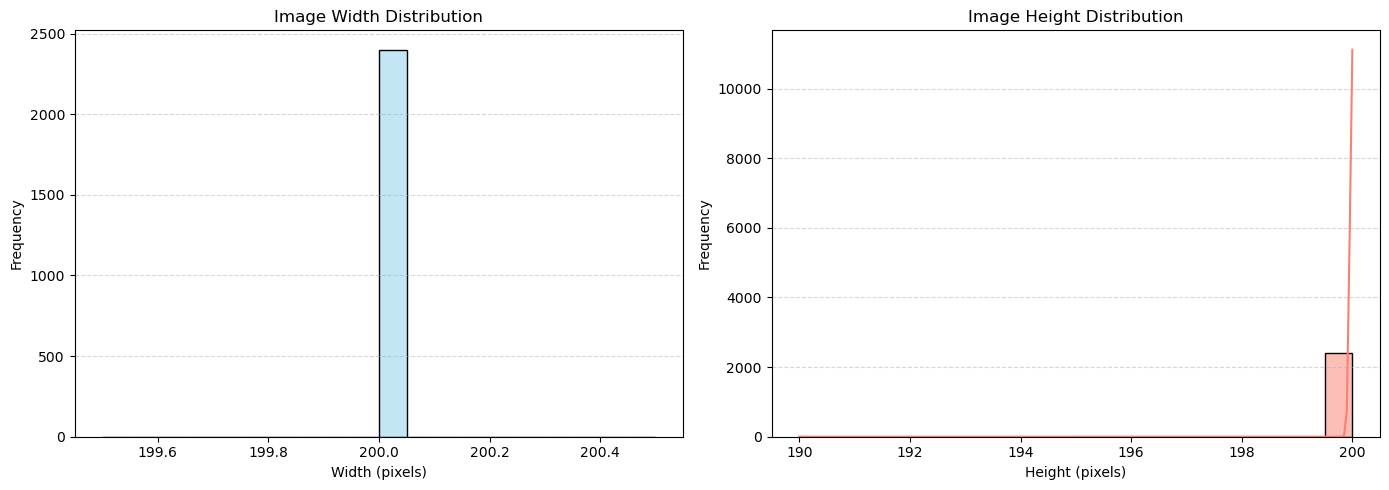

 Size distribution plot saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_size_distribution.png


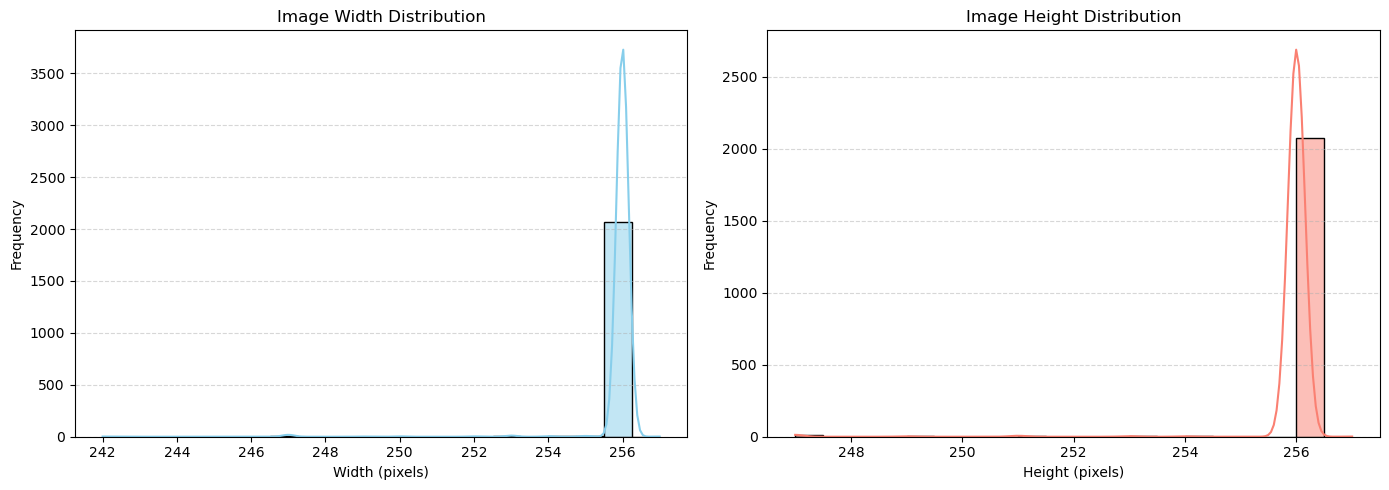

 Size distribution plot saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_size_distribution.png


In [10]:
# 2.4 – Visualize Image Size Distribution
# Plot histograms for image width and height separately

def plot_image_size_distribution(dataset_path, class_names, save_path=None, dataset_name="dataset"):
    heights, widths = [], []
    for cls in class_names:
        cls_path = dataset_path / cls
        for img_file in cls_path.glob("*"):
            img = cv2.imread(str(img_file))
            if img is not None:
                h, w = img.shape[:2]
                heights.append(h)
                widths.append(w)

    plt.figure(figsize=(14, 5))

    # Width distribution
    plt.subplot(1, 2, 1)
    sns.histplot(widths, bins=20, kde=True, color="skyblue")
    plt.title("Image Width Distribution")
    plt.xlabel("Width (pixels)")
    plt.ylabel("Frequency")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    # Height distribution
    plt.subplot(1, 2, 2)
    sns.histplot(heights, bins=20, kde=True, color="salmon")
    plt.title("Image Height Distribution")
    plt.xlabel("Height (pixels)")
    plt.ylabel("Frequency")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()

    # Save figure if save_path provided
    if save_path:
        save_file = save_path / f"{dataset_name.replace(' ', '_').lower()}_size_distribution.png"
        plt.savefig(save_file)

    plt.show()
    print(f" Size distribution plot saved to {save_file}")
    plt.close()

# Apply to both datasets and save plots
plot_image_size_distribution(SIRI_DIR, class_names_siri, save_path=VISUALS_DIR, dataset_name="SIRI-WHU")
plot_image_size_distribution(UC_DIR, class_names_uc, save_path=VISUALS_DIR, dataset_name="UC Merced")


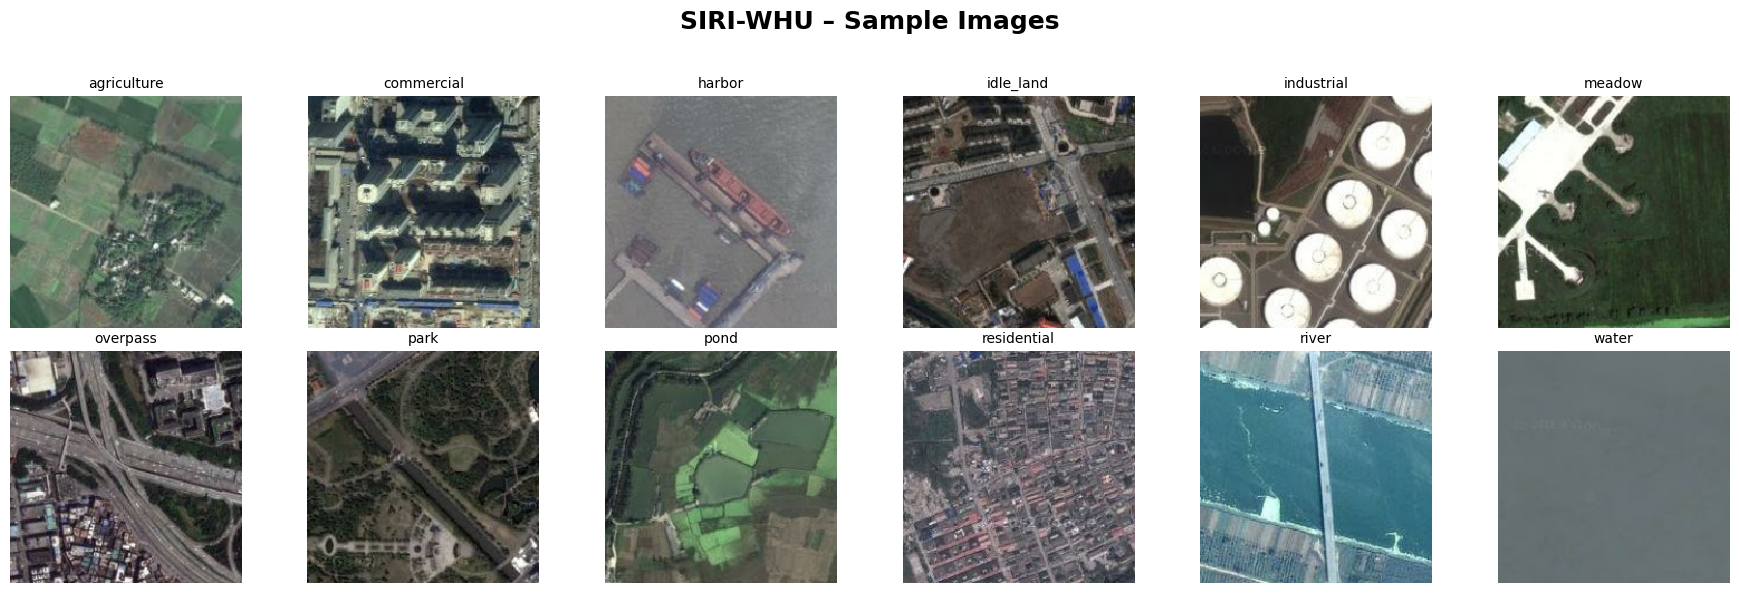

 Sample images grid saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_–_sample_images.png


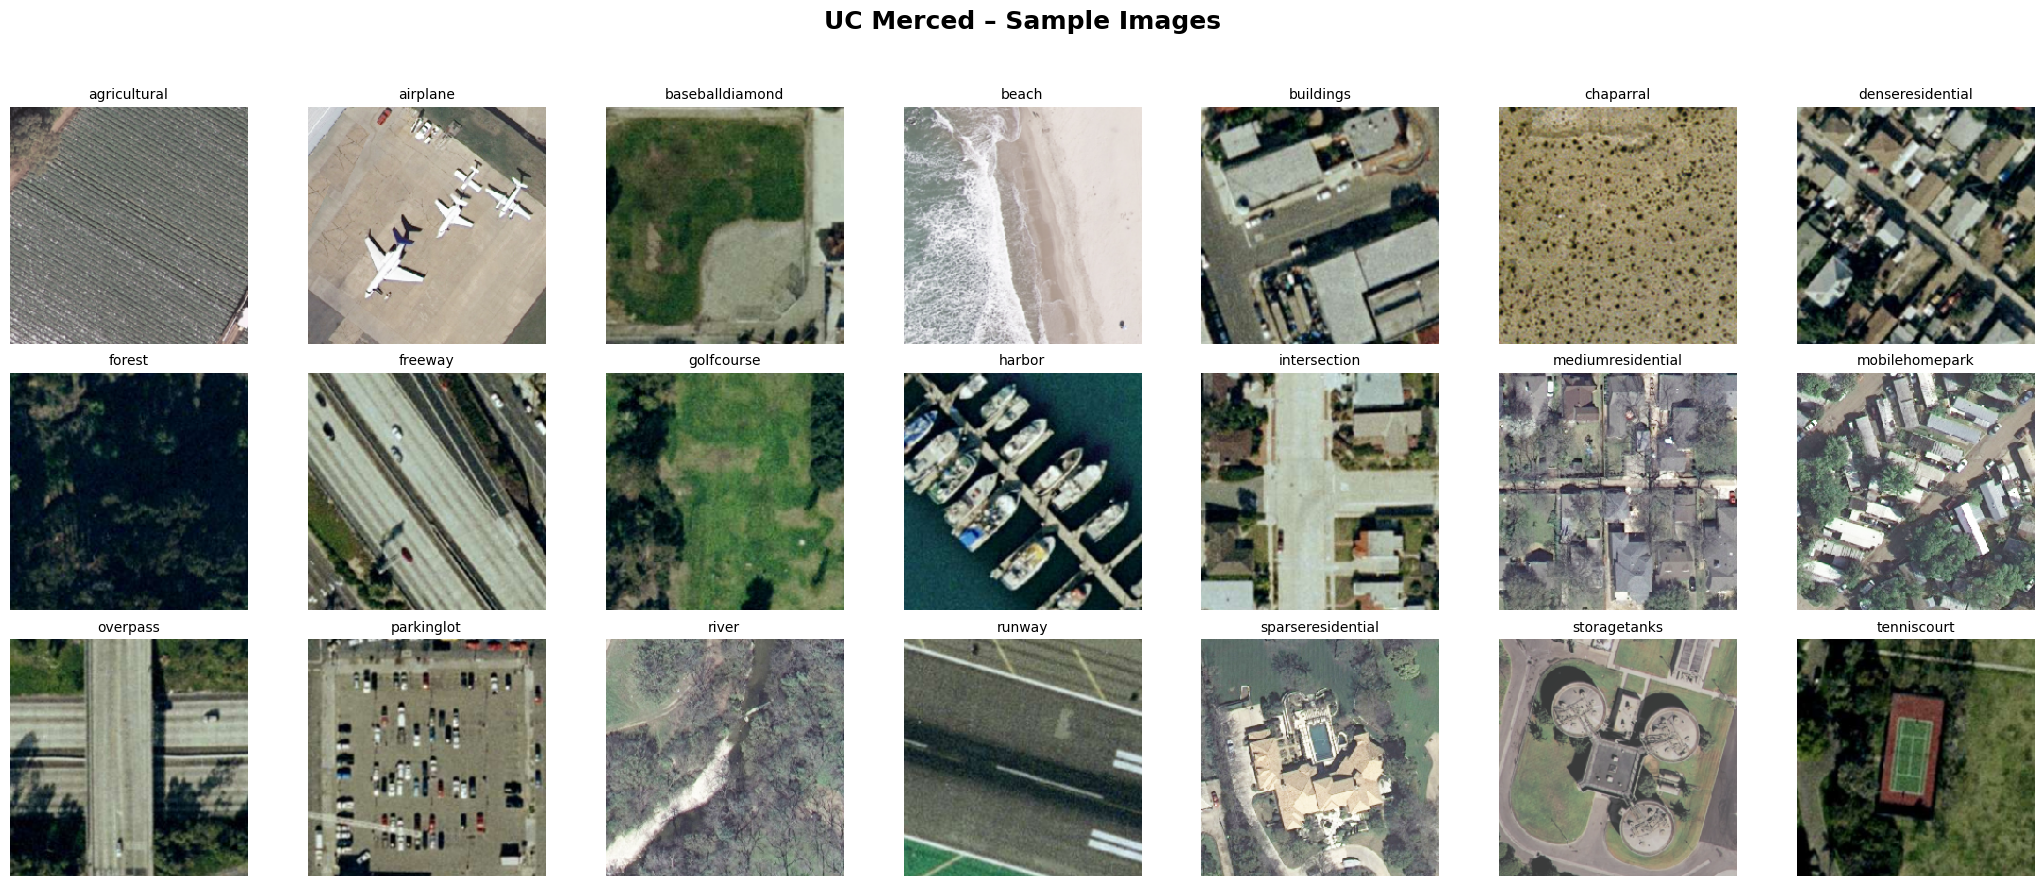

 Sample images grid saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_–_sample_images.png


In [11]:
# 2.5 – Display One Sample Image per Class

def show_sample_images_per_class(X, y, class_names, title="Sample Images", max_cols=7, save_path=None):
    """
    Display one image per class in a grid.

    Parameters:
    - X: images array
    - y: labels array
    - class_names: list of class names
    - title: plot title
    - max_cols: columns in grid
    - save_path: path to save the figure
    """
    num_classes = len(class_names)
    rows = math.ceil(num_classes / max_cols)
    fig, axes = plt.subplots(rows, max_cols, figsize=(3 * max_cols, 3 * rows))

    for i in range(rows * max_cols):
        row, col = divmod(i, max_cols)
        if rows > 1:
            ax = axes[row][col]
        else:
            ax = axes[col]

        if i < num_classes:
            sample_idx = np.where(y == i)[0][0]
            img = X[sample_idx].astype(np.uint8)
            ax.imshow(img)
            ax.set_title(class_names[i], fontsize=10)
        ax.axis("off")

    fig.suptitle(title, fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Save the figure if save_path is provided
    if save_path:
        save_file = save_path / f"{title.replace(' ', '_').lower()}.png"
        plt.savefig(save_file)

    plt.show()
    print(f" Sample images grid saved to {save_file}")
    plt.close()

# Display and save sample images for each class – SIRI-WHU
show_sample_images_per_class(
    X_siri, y_siri, class_names_siri,
    title="SIRI-WHU – Sample Images", max_cols=6, save_path=VISUALS_DIR
)

# Display and save sample images for each class – UC Merced
show_sample_images_per_class(
    X_uc, y_uc, class_names_uc,
    title="UC Merced – Sample Images", max_cols=7, save_path=VISUALS_DIR
)


In [12]:
# 2.6 – Check for Corrupt or Blank Images
# Identify unreadable or near-black images in dataset

def check_corrupt_or_blank_images(dataset_path, class_names, dataset_name="Dataset"):
    print(f"\nChecking for corrupt or blank images in {dataset_name}...")
    corrupt, blank = 0, 0
    for cls in class_names:
        cls_dir = dataset_path / cls
        for img_name in os.listdir(cls_dir):
            img_path = cls_dir / img_name
            try:
                img = cv2.imread(str(img_path))
                if img is None:
                    print(f"Corrupt image: {img_path}")
                    corrupt += 1
                elif img.mean() < 1.0:
                    print(f"Blank image: {img_path}")
                    blank += 1
            except Exception as e:
                print(f"Error reading: {img_path} → {e}")
                corrupt += 1
    print(f"{dataset_name} check complete → Corrupt: {corrupt}, Blank: {blank}")

# Check SIRI-WHU dataset
check_corrupt_or_blank_images(SIRI_DIR, class_names_siri, "SIRI-WHU")

# Check UC Merced dataset
check_corrupt_or_blank_images(UC_DIR, class_names_uc, "UC Merced")



Checking for corrupt or blank images in SIRI-WHU...
SIRI-WHU check complete → Corrupt: 0, Blank: 0

Checking for corrupt or blank images in UC Merced...
UC Merced check complete → Corrupt: 0, Blank: 0


In [13]:
# 3.1 – Split SIRI-WHU and UC Merced Datasets into Train/Test Sets

# Split SIRI-WHU (using random_state = 20)
X_train_siri, X_test_siri, y_train_siri, y_test_siri = train_test_split(
    X_siri, y_siri, test_size=0.2, stratify=y_siri, random_state=20
)

# Split UC Merced (using random_state = 42)
X_train_uc, X_test_uc, y_train_uc, y_test_uc = train_test_split(
    X_uc, y_uc, test_size=0.2, stratify=y_uc, random_state=42
)

# Display dataset shapes after splitting
print(f"SIRI-WHU – Train: {X_train_siri.shape}, Test: {X_test_siri.shape}")
print(f"UC Merced – Train: {X_train_uc.shape}, Test: {X_test_uc.shape}")

SIRI-WHU – Train: (1920, 224, 224, 3), Test: (480, 224, 224, 3)
UC Merced – Train: (1680, 224, 224, 3), Test: (420, 224, 224, 3)


In [14]:
# 3.2 – Summarize Class Distribution After Splitting
# Print number of samples per class (train/test split)

def summarize_class_distribution(y_labels, class_names, dataset_name="Dataset"):
    """
    Show number of samples per class.
    
    Parameters:
    - y_labels: array of class indices
    - class_names: list of class names
    - dataset_name: split name (e.g., 'Train')
    """
    df = pd.DataFrame({"label": y_labels})
    counts = df["label"].value_counts().sort_index()
    print(f"\nClass distribution in {dataset_name}:")
    for idx, count in counts.items():
        print(f"  - {class_names[idx]:<20}: {count} samples")

# Display class distribution for all splits
summarize_class_distribution(y_train_siri, class_names_siri, "SIRI-WHU – Train")
summarize_class_distribution(y_test_siri, class_names_siri, "SIRI-WHU – Test")
summarize_class_distribution(y_train_uc, class_names_uc, "UC Merced – Train")
summarize_class_distribution(y_test_uc, class_names_uc, "UC Merced – Test")



Class distribution in SIRI-WHU – Train:
  - agriculture         : 160 samples
  - commercial          : 160 samples
  - harbor              : 160 samples
  - idle_land           : 160 samples
  - industrial          : 160 samples
  - meadow              : 160 samples
  - overpass            : 160 samples
  - park                : 160 samples
  - pond                : 160 samples
  - residential         : 160 samples
  - river               : 160 samples
  - water               : 160 samples

Class distribution in SIRI-WHU – Test:
  - agriculture         : 40 samples
  - commercial          : 40 samples
  - harbor              : 40 samples
  - idle_land           : 40 samples
  - industrial          : 40 samples
  - meadow              : 40 samples
  - overpass            : 40 samples
  - park                : 40 samples
  - pond                : 40 samples
  - residential         : 40 samples
  - river               : 40 samples
  - water               : 40 samples

Class distribution

In [15]:
# 4.1 – Load Pretrained CNN Models
# Load ResNet, DenseNet, and EfficientNet without top layers

# Define input shape expected by the models
INPUT_SHAPE = (224, 224, 3)

# Load pretrained models with global average pooling instead of dense layers
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg", input_shape=INPUT_SHAPE)
densenet_model = DenseNet169(weights="imagenet", include_top=False, pooling="avg", input_shape=INPUT_SHAPE)
efficientnet_model = EfficientNetB0(weights="imagenet", include_top=False, pooling="avg", input_shape=INPUT_SHAPE)

# Display the output shape from each model
print("Output shape of each network after Global Average Pooling:")
print("ResNet50 output shape:", resnet_model.output_shape)
print("DenseNet169 output shape:", densenet_model.output_shape)
print("EfficientNetB0 output shape:", efficientnet_model.output_shape)


Output shape of each network after Global Average Pooling:
ResNet50 output shape: (None, 2048)
DenseNet169 output shape: (None, 1664)
EfficientNetB0 output shape: (None, 1280)


In [16]:
# 4.2 – Summarize CNN Feature Dimensions
# Create a table of CNN output sizes and cumulative dimensions

# Prepare summary table
feature_dims = {
    "Model": ["ResNet50", "DenseNet169", "EfficientNetB0"],
    "Output Dimension": [
        resnet_model.output_shape[1],
        densenet_model.output_shape[1],
        efficientnet_model.output_shape[1],
    ]
}

df_features = pd.DataFrame(feature_dims)
df_features["Cumulative Dimension (Progressive Sum)"] = df_features["Output Dimension"].cumsum()

# Display the summary table
display(df_features)

# Save as CSV
csv_file = RESULTS_DIR / "cnn_feature_dimensions.csv"
df_features.to_csv(csv_file, index=False)
print(f" CSV saved to {csv_file}")

# Save as Excel
excel_file = RESULTS_DIR / "cnn_feature_dimensions.xlsx"
df_features.to_excel(excel_file, index=False)
print(f" Excel saved to {excel_file}")

Model  Output Dimension  Cumulative Dimension (Progressive Sum)
0        ResNet50              2048                                    2048
1     DenseNet169              1664                                    3712
2  EfficientNetB0              1280                                    4992

 CSV saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\results\cnn_feature_dimensions.csv
 Excel saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\results\cnn_feature_dimensions.xlsx


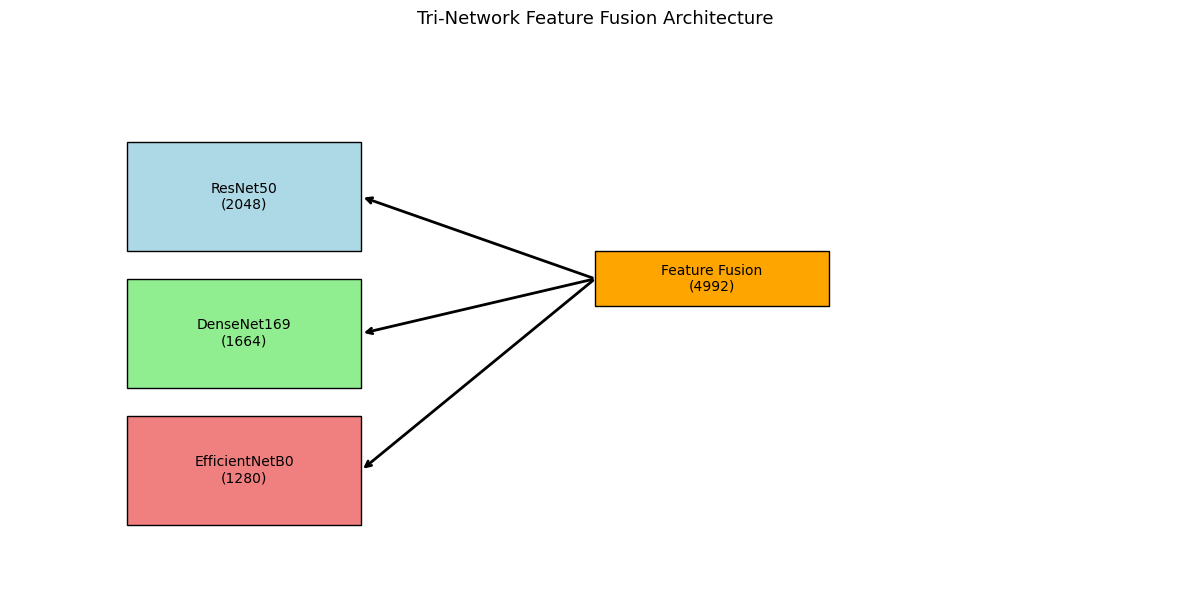

Fusion diagram saved to: C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\tri_network_fusion_manual.png


In [17]:
# 4.3 – Draw Feature Fusion Diagram
# Visualize feature fusion from ResNet, DenseNet, and EfficientNet

def draw_network_fusion_diagram(output_path):
    fig, ax = plt.subplots(figsize=(12, 6))

    # Draw three CNN blocks
    ax.add_patch(Rectangle((0.1, 0.6), 0.2, 0.2, edgecolor='black', facecolor='lightblue'))
    ax.text(0.2, 0.7, 'ResNet50\n(2048)', ha='center', va='center', fontsize=10)

    ax.add_patch(Rectangle((0.1, 0.35), 0.2, 0.2, edgecolor='black', facecolor='lightgreen'))
    ax.text(0.2, 0.45, 'DenseNet169\n(1664)', ha='center', va='center', fontsize=10)

    ax.add_patch(Rectangle((0.1, 0.1), 0.2, 0.2, edgecolor='black', facecolor='lightcoral'))
    ax.text(0.2, 0.2, 'EfficientNetB0\n(1280)', ha='center', va='center', fontsize=10)

    # Arrows to fusion
    ax.annotate('', xy=(0.3, 0.7), xytext=(0.5, 0.55),
                arrowprops=dict(arrowstyle='->', linewidth=2))
    ax.annotate('', xy=(0.3, 0.45), xytext=(0.5, 0.55),
                arrowprops=dict(arrowstyle='->', linewidth=2))
    ax.annotate('', xy=(0.3, 0.2), xytext=(0.5, 0.55),
                arrowprops=dict(arrowstyle='->', linewidth=2))

    # Fusion block
    ax.add_patch(Rectangle((0.5, 0.5), 0.2, 0.1, edgecolor='black', facecolor='orange'))
    ax.text(0.6, 0.55, 'Feature Fusion\n(4992)', ha='center', va='center', fontsize=10)

    # Layout config
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.title("Tri-Network Feature Fusion Architecture", fontsize=13)
    plt.tight_layout()

    # Save diagram
    output_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(output_path, dpi=300)
    plt.show()
    print(f"Fusion diagram saved to: {output_path}")

# Generate and save the diagram
diagram_path = VISUALS_DIR / "tri_network_fusion_manual.png"
draw_network_fusion_diagram(diagram_path)


In [18]:
# 4.4 – Preprocessing Summary
# Notes on preprocessing for each pretrained CNN (applied in extract_features)

print("Preprocessing Notes:")
print("- ResNet50: Converts RGB to BGR and subtracts mean pixel values (via keras.applications.resnet50.preprocess_input)")
print("- DenseNet169: Normalizes pixel values to [0, 1] range (via keras.applications.densenet.preprocess_input)")
print("- EfficientNetB0: Scales pixel values to [-1, 1] range (via keras.applications.efficientnet.preprocess_input)")
print("These preprocessing steps are automatically applied inside the extract_features() function.")


Preprocessing Notes:
- ResNet50: Converts RGB to BGR and subtracts mean pixel values (via keras.applications.resnet50.preprocess_input)
- DenseNet169: Normalizes pixel values to [0, 1] range (via keras.applications.densenet.preprocess_input)
- EfficientNetB0: Scales pixel values to [-1, 1] range (via keras.applications.efficientnet.preprocess_input)
These preprocessing steps are automatically applied inside the extract_features() function.


In [19]:
# 5.1 – Feature Extraction and Scaling for Each CNN and Dataset Split 

def extract_features(model, preprocess_fn, X_data, batch_size=32):
    """Preprocess data and extract features from CNN."""
    X_processed = preprocess_fn(X_data.copy())
    return model.predict(X_processed, batch_size=batch_size, verbose=1)

# Define list of models with their preprocessing functions
models_info = [
    ("resnet", resnet_model, resnet_pre),
    ("densenet", densenet_model, densenet_pre),
    ("efficientnet", efficientnet_model, efficientnet_pre)
]

# Dictionaries to store features (raw and scaled)
features_siri_raw = {}
features_uc_raw = {}
features_siri_scaled = {}
features_uc_scaled = {}

print("Extracting and Scaling Features for Each CNN – SIRI-WHU & UC Merced")

for name, model, pre_fn in models_info:
    # SIRI-WHU dataset
    print(f"\n{name.upper()} – SIRI-WHU")
    X_train_feat = extract_features(model, pre_fn, X_train_siri)
    X_test_feat  = extract_features(model, pre_fn, X_test_siri)

    print(f"   Shape (train): {X_train_feat.shape}, (test): {X_test_feat.shape}")
    features_siri_raw[f"{name}_train"] = X_train_feat
    features_siri_raw[f"{name}_test"] = X_test_feat

    scaler_siri = StandardScaler()
    features_siri_scaled[f"{name}_train_scaled"] = scaler_siri.fit_transform(X_train_feat)
    features_siri_scaled[f"{name}_test_scaled"]  = scaler_siri.transform(X_test_feat)

    print(f"   Scaled shape (train): {features_siri_scaled[f'{name}_train_scaled'].shape}")

    # UC Merced dataset
    print(f"\n{name.upper()} – UC Merced")
    X_train_feat = extract_features(model, pre_fn, X_train_uc)
    X_test_feat  = extract_features(model, pre_fn, X_test_uc)

    print(f"   Shape (train): {X_train_feat.shape}, (test): {X_test_feat.shape}")
    features_uc_raw[f"{name}_train"] = X_train_feat
    features_uc_raw[f"{name}_test"] = X_test_feat

    scaler_uc = StandardScaler()
    features_uc_scaled[f"{name}_train_scaled"] = scaler_uc.fit_transform(X_train_feat)
    features_uc_scaled[f"{name}_test_scaled"]  = scaler_uc.transform(X_test_feat)

    print(f"   Scaled shape (train): {features_uc_scaled[f'{name}_train_scaled'].shape}")


Extracting and Scaling Features for Each CNN – SIRI-WHU & UC Merced

RESNET – SIRI-WHU
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 640ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 741ms/step
   Shape (train): (1920, 2048), (test): (480, 2048)
   Scaled shape (train): (1920, 2048)

RESNET – UC Merced
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 779ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 696ms/step
   Shape (train): (1680, 2048), (test): (420, 2048)
   Scaled shape (train): (1680, 2048)

DENSENET – SIRI-WHU
60/60 ━━━━━━━━━━━━━━━━━━━━ 54s 848ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 847ms/step
   Shape (train): (1920, 1664), (test): (480, 1664)
   Scaled shape (train): (1920, 1664)

DENSENET – UC Merced
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 894ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 975ms/step
   Shape (train): (1680, 1664), (test): (420, 1664)
   Scaled shape (train): (1680, 1664)

EFFICIENTNET – SIRI-WHU
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 597ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 670ms/step
   Shape (train): (1920, 1280), (test): (480,

In [20]:
# 5.2 – Correlation Analysis Between CNN Feature Sets
# Lower correlation = more complementary features

def compute_feature_correlation(f1, f2, method="pearson"):
    """
    Compute the average correlation between two feature sets (same shape).

    Parameters:
    - f1, f2: numpy arrays of shape (n_samples, n_features)
    - method: correlation method to use ('pearson' or 'spearman')

    Returns:
    - Average correlation
    """
    df1 = pd.DataFrame(f1)
    df2 = pd.DataFrame(f2)
    if method == "pearson":
        corr_matrix = df1.corrwith(df2, axis=0, method='pearson')
    elif method == "spearman":
        corr_matrix = df1.corrwith(df2, axis=0, method='spearman')
    else:
        raise ValueError("Unsupported correlation method.")
    return np.mean(corr_matrix)

# Run correlation analysis for both datasets
print("Feature Correlation – SIRI-WHU")
print(f"ResNet50 vs DenseNet169      : {compute_feature_correlation(features_siri_raw['resnet_train'], features_siri_raw['densenet_train']):.4f}")
print(f"ResNet50 vs EfficientNetB0   : {compute_feature_correlation(features_siri_raw['resnet_train'], features_siri_raw['efficientnet_train']):.4f}")
print(f"DenseNet169 vs EfficientNetB0: {compute_feature_correlation(features_siri_raw['densenet_train'], features_siri_raw['efficientnet_train']):.4f}")

print("\nFeature Correlation – UC Merced")
print(f"ResNet50 vs DenseNet169      : {compute_feature_correlation(features_uc_raw['resnet_train'], features_uc_raw['densenet_train']):.4f}")
print(f"ResNet50 vs EfficientNetB0   : {compute_feature_correlation(features_uc_raw['resnet_train'], features_uc_raw['efficientnet_train']):.4f}")
print(f"DenseNet169 vs EfficientNetB0: {compute_feature_correlation(features_uc_raw['densenet_train'], features_uc_raw['efficientnet_train']):.4f}")

Feature Correlation – SIRI-WHU
ResNet50 vs DenseNet169      : 0.0132
ResNet50 vs EfficientNetB0   : 0.0291
DenseNet169 vs EfficientNetB0: 0.0122

Feature Correlation – UC Merced
ResNet50 vs DenseNet169      : 0.0237
ResNet50 vs EfficientNetB0   : 0.0392
DenseNet169 vs EfficientNetB0: 0.0215


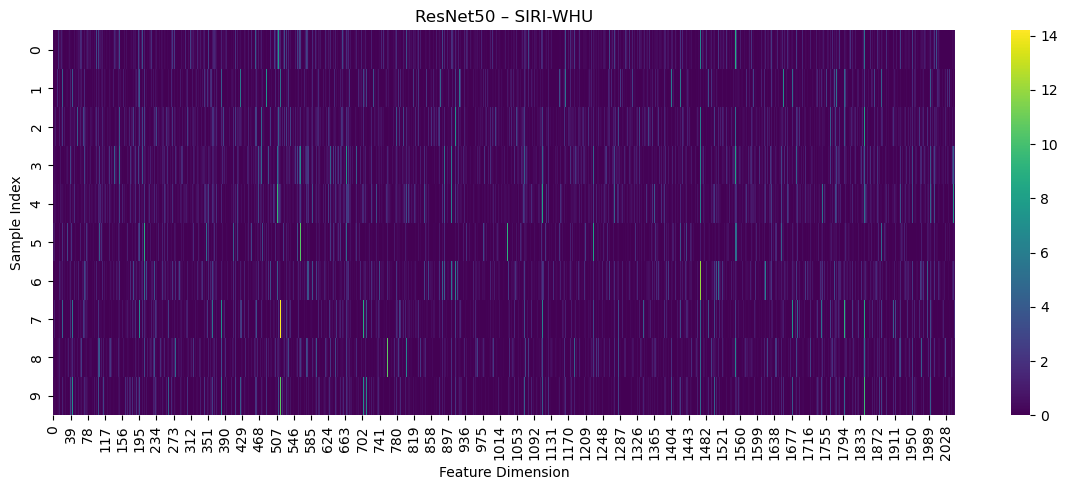

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\resnet50_-_siri-whu.png


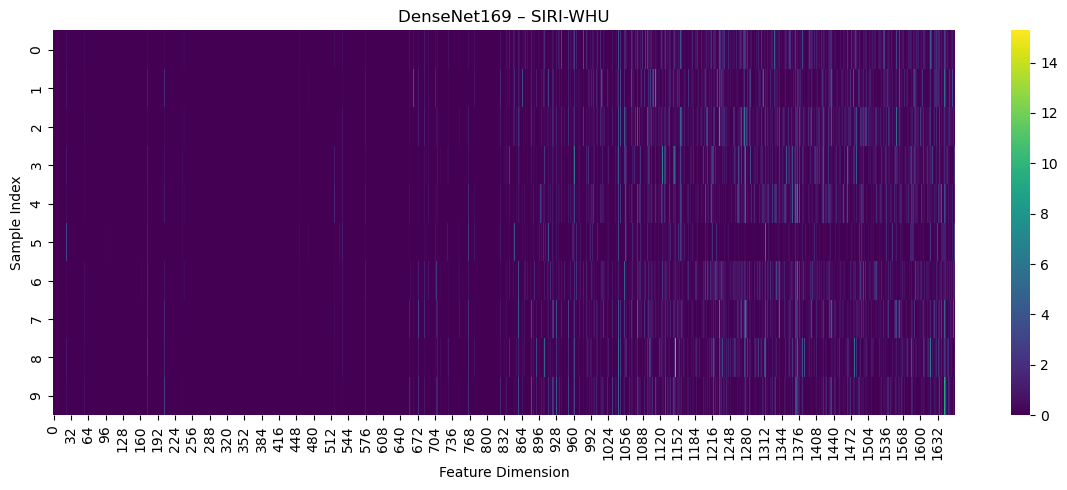

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\densenet169_-_siri-whu.png


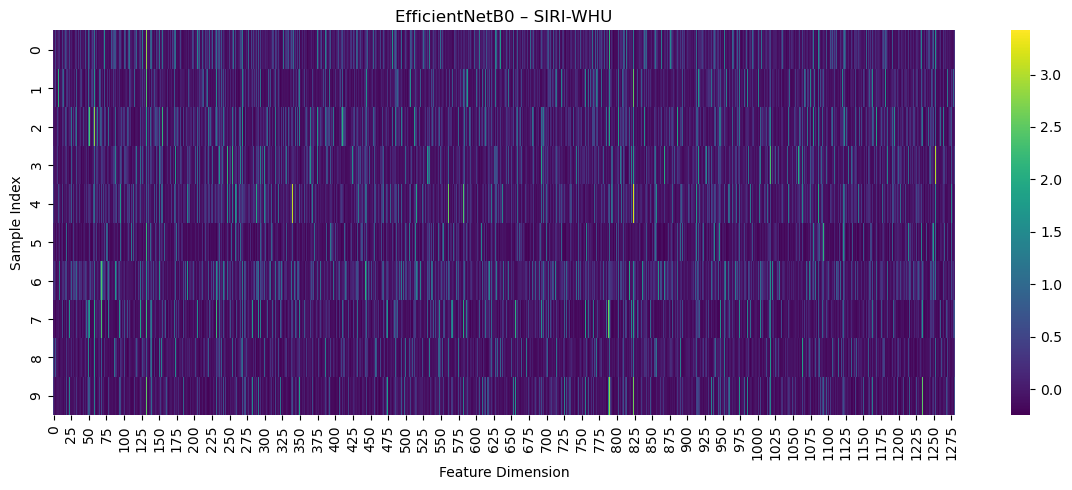

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\efficientnetb0_-_siri-whu.png


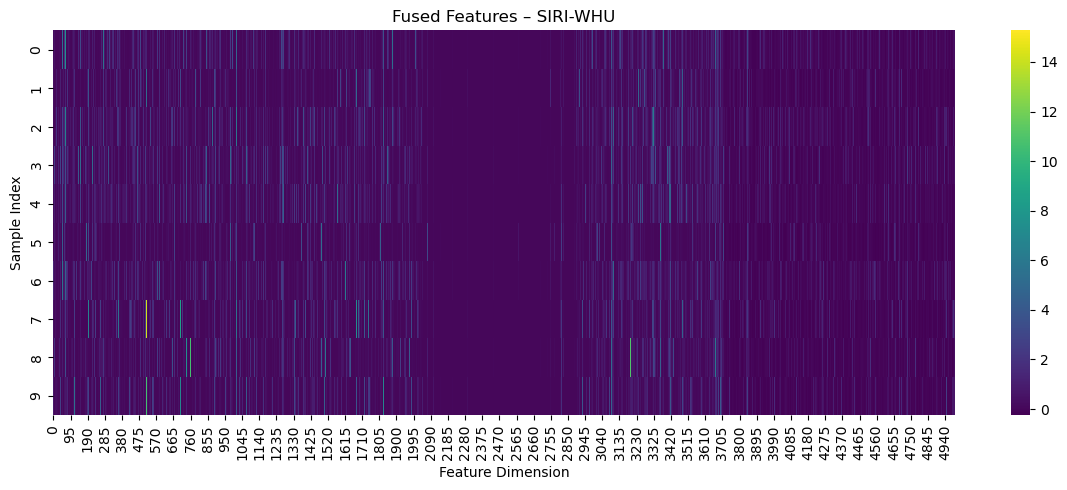

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\fused_features_-_siri-whu.png


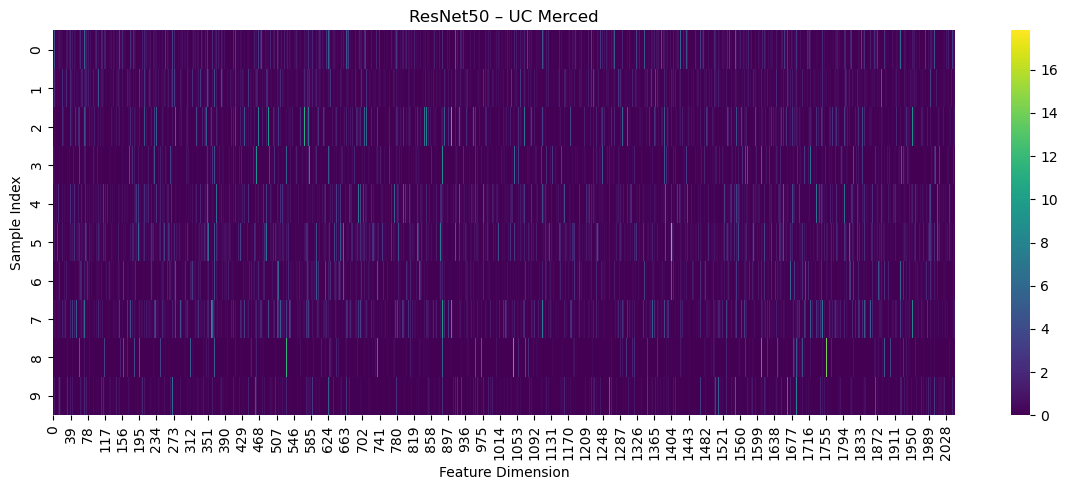

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\resnet50_-_uc_merced.png


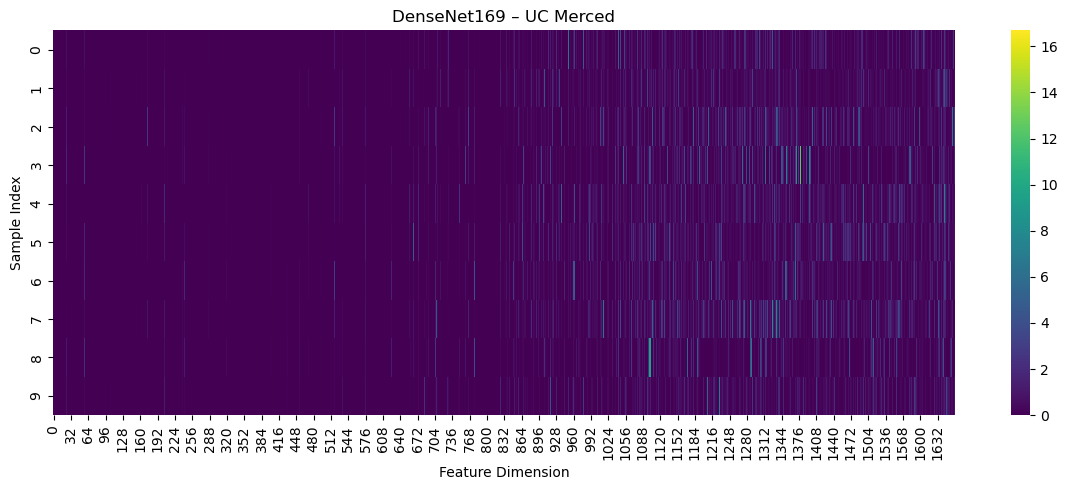

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\densenet169_-_uc_merced.png


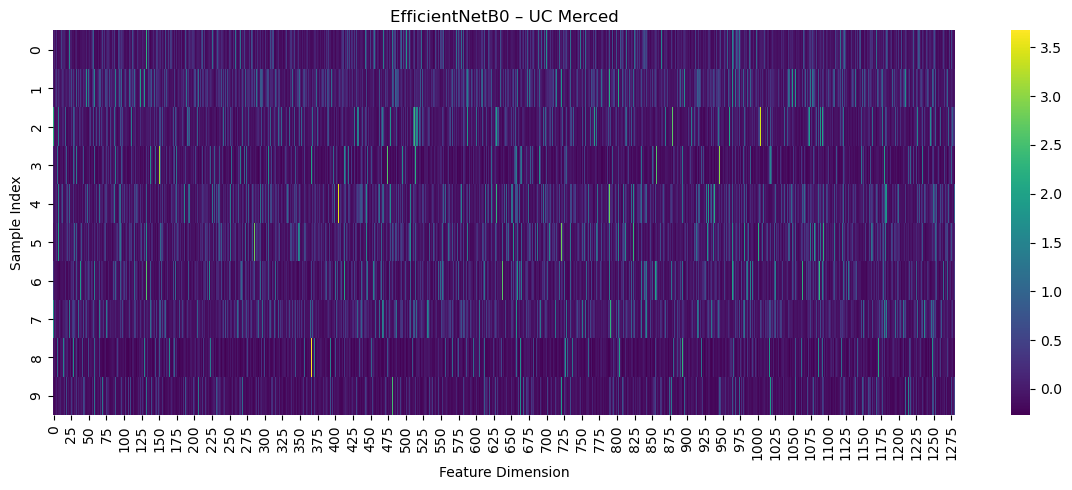

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\efficientnetb0_-_uc_merced.png


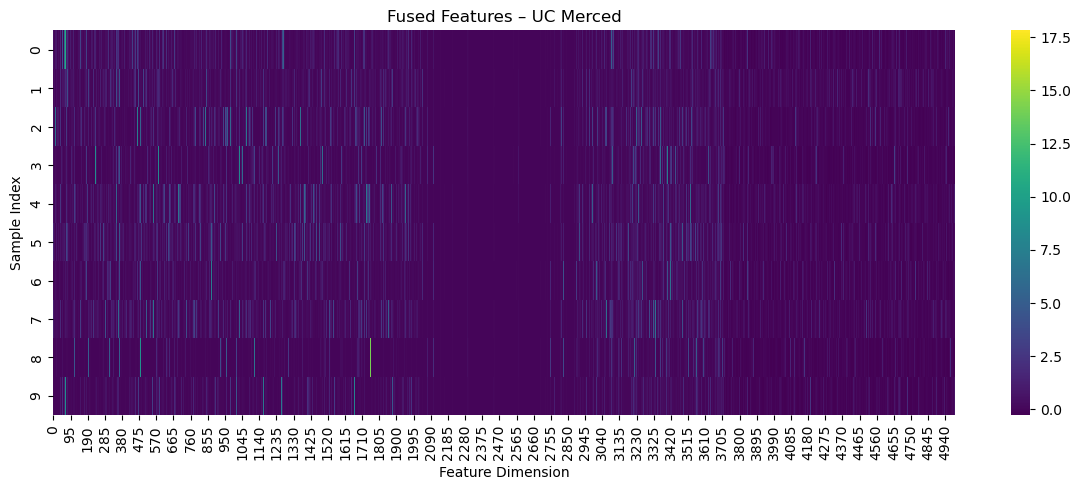

 Heatmap saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\fused_features_-_uc_merced.png


In [21]:
# 5.3 – Heatmap Visualization of CNN Features
# Show feature maps for individual CNNs and their fused representations

# Fuse features (train sets only)
fused_train_siri = np.concatenate([
    features_siri_raw["resnet_train"],
    features_siri_raw["densenet_train"],
    features_siri_raw["efficientnet_train"]
], axis=1)

fused_train_uc = np.concatenate([
    features_uc_raw["resnet_train"],
    features_uc_raw["densenet_train"],
    features_uc_raw["efficientnet_train"]
], axis=1)

# Heatmap plotting function with save option
def plot_feature_heatmap(features, title="Feature Heatmap", num_samples=10, cmap="viridis", save_path=None):
    sampled = features[:num_samples]
    plt.figure(figsize=(12, 5))
    sns.heatmap(sampled, cmap=cmap, cbar=True)
    plt.title(title)
    plt.xlabel("Feature Dimension")
    plt.ylabel("Sample Index")
    plt.tight_layout()

    # Save plot if save_path provided
    if save_path:
        filename = title.replace(" ", "_").replace("–", "-").lower() + ".png"
        full_path = save_path / filename
        plt.savefig(full_path)

    plt.show()
    print(f" Heatmap saved to {full_path}")
    plt.close()

# Visualize and save heatmaps for SIRI-WHU
plot_feature_heatmap(features_siri_raw["resnet_train"], "ResNet50 – SIRI-WHU", save_path=VISUALS_DIR)
plot_feature_heatmap(features_siri_raw["densenet_train"], "DenseNet169 – SIRI-WHU", save_path=VISUALS_DIR)
plot_feature_heatmap(features_siri_raw["efficientnet_train"], "EfficientNetB0 – SIRI-WHU", save_path=VISUALS_DIR)
plot_feature_heatmap(fused_train_siri, "Fused Features – SIRI-WHU", save_path=VISUALS_DIR)

# Visualize and save heatmaps for UC Merced
plot_feature_heatmap(features_uc_raw["resnet_train"], "ResNet50 – UC Merced", save_path=VISUALS_DIR)
plot_feature_heatmap(features_uc_raw["densenet_train"], "DenseNet169 – UC Merced", save_path=VISUALS_DIR)
plot_feature_heatmap(features_uc_raw["efficientnet_train"], "EfficientNetB0 – UC Merced", save_path=VISUALS_DIR)
plot_feature_heatmap(fused_train_uc, "Fused Features – UC Merced", save_path=VISUALS_DIR)


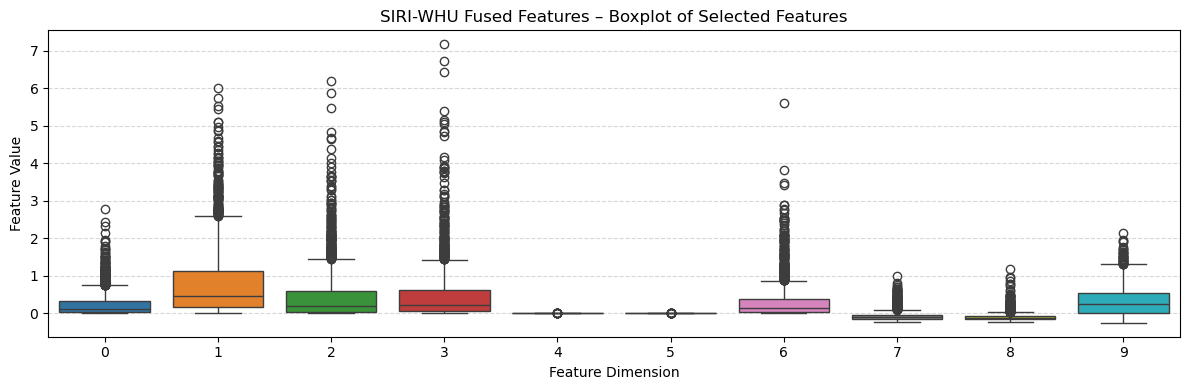

 Boxplot saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_fused_features_boxplot.png


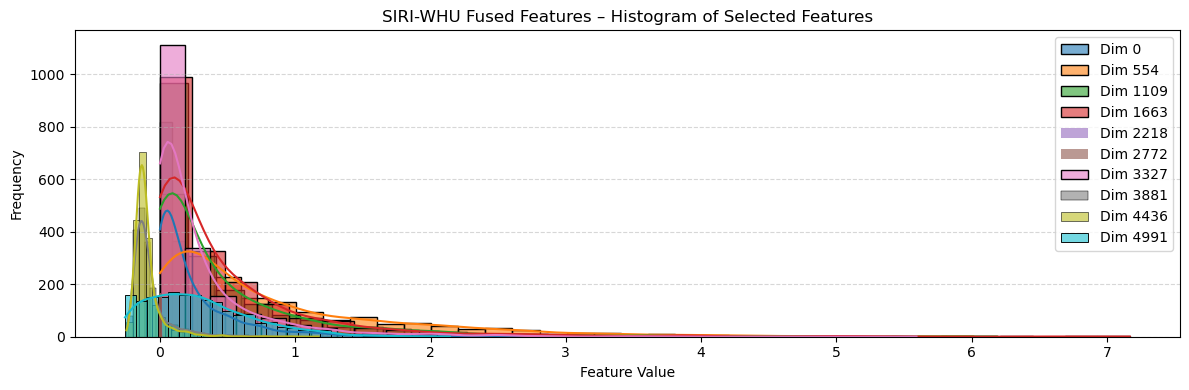

 Histogram saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_fused_features_histogram.png


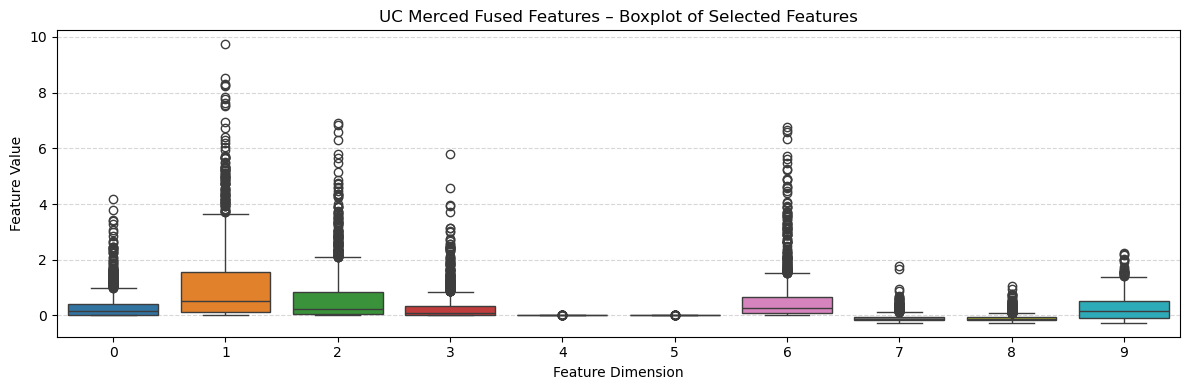

 Boxplot saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_fused_features_boxplot.png


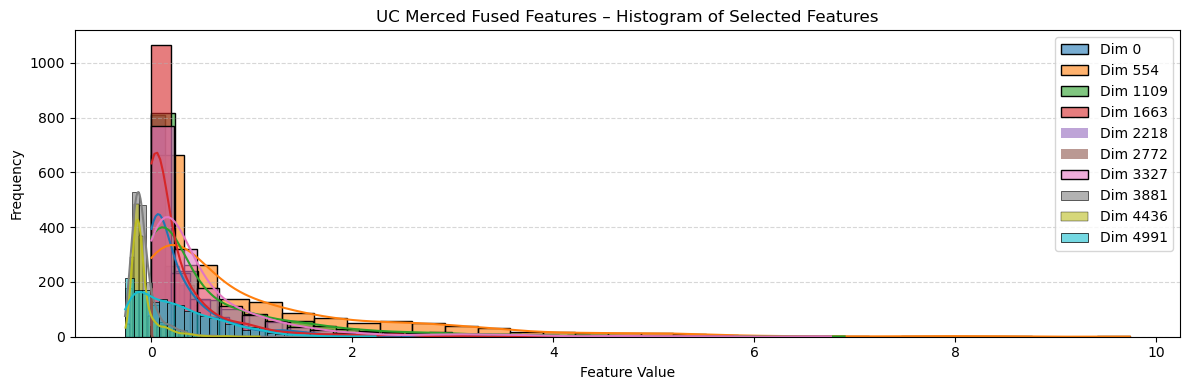

 Histogram saved to C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_fused_features_histogram.png


In [22]:
# 5.4 – Feature Distribution (Boxplot + Histogram)
# Visualize value distributions of selected feature dimensions

def plot_feature_distribution(features, title_prefix="Features", num_dims=10, save_path=None):
    """
    Plot boxplots and histograms for selected feature dimensions, and optionally save them.

    Parameters:
    - features: Feature matrix (samples x features)
    - title_prefix: Title prefix for plots
    - num_dims: Number of dimensions to visualize
    - save_path: Directory to save plots
    """
    dims = np.linspace(0, features.shape[1] - 1, num_dims, dtype=int)

    # Boxplot
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=features[:, dims])
    plt.title(f"{title_prefix} – Boxplot of Selected Features")
    plt.xlabel("Feature Dimension")
    plt.ylabel("Feature Value")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()

    if save_path:
        boxplot_file = save_path / f"{title_prefix.replace(' ', '_').lower()}_boxplot.png"
        plt.savefig(boxplot_file)
        
    plt.show()
    print(f" Boxplot saved to {boxplot_file}")
    plt.close()

    # Histogram
    plt.figure(figsize=(12, 4))
    for dim in dims:
        sns.histplot(features[:, dim], kde=True, bins=30, label=f"Dim {dim}", alpha=0.6)
    plt.title(f"{title_prefix} – Histogram of Selected Features")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend()
    plt.tight_layout()

    if save_path:
        hist_file = save_path / f"{title_prefix.replace(' ', '_').lower()}_histogram.png"
        plt.savefig(hist_file)

    plt.show()
    print(f" Histogram saved to {hist_file}")
    plt.close()


# SIRI-WHU – Fused Features
plot_feature_distribution(fused_train_siri, "SIRI-WHU Fused Features", save_path=VISUALS_DIR)

# UC Merced – Fused Features
plot_feature_distribution(fused_train_uc, "UC Merced Fused Features", save_path=VISUALS_DIR)


In [23]:
# 5.5 – Save Extracted Features (joblib)
# Save CNN features and labels for reuse

# Create a directory to store feature files
FEATURES_DIR = PROCESSED_DIR / "features"
FEATURES_DIR.mkdir(parents=True, exist_ok=True)

def save_features_dict(features_dict, labels_dict, dataset_dir):
    dataset_dir.mkdir(parents=True, exist_ok=True)
    for key in features_dict:
        label_key = "y_train" if "train" in key else "y_test"
        labels = labels_dict[label_key]
        joblib.dump((features_dict[key], labels), dataset_dir / f"{key}.pkl")
        print(f"  Saved: {key}.pkl → shape: {features_dict[key].shape}")

# Save extracted features for SIRI-WHU (raw, unscaled)
siri_dir = FEATURES_DIR / "siri_raw"
labels_siri = {"y_train": y_train_siri, "y_test": y_test_siri}
save_features_dict(features_siri_raw, labels_siri, siri_dir)

# Save extracted features for UC Merced (raw, unscaled)
uc_dir = FEATURES_DIR / "uc_raw"
labels_uc = {"y_train": y_train_uc, "y_test": y_test_uc}
save_features_dict(features_uc_raw, labels_uc, uc_dir)

  Saved: resnet_train.pkl → shape: (1920, 2048)
  Saved: resnet_test.pkl → shape: (480, 2048)
  Saved: densenet_train.pkl → shape: (1920, 1664)
  Saved: densenet_test.pkl → shape: (480, 1664)
  Saved: efficientnet_train.pkl → shape: (1920, 1280)
  Saved: efficientnet_test.pkl → shape: (480, 1280)
  Saved: resnet_train.pkl → shape: (1680, 2048)
  Saved: resnet_test.pkl → shape: (420, 2048)
  Saved: densenet_train.pkl → shape: (1680, 1664)
  Saved: densenet_test.pkl → shape: (420, 1664)
  Saved: efficientnet_train.pkl → shape: (1680, 1280)
  Saved: efficientnet_test.pkl → shape: (420, 1280)


In [24]:
# 6.1 – Load, Fuse, and Normalize Features from Saved Pickle Files
# Combine CNN feature sets and apply scaling

def load_features(path, name):
    features, labels = joblib.load(path / f"{name}.pkl")
    return features, labels

def fuse_features(dataset_dir, split, scaler=None):
    """
    Load features from ResNet50, DenseNet169, and EfficientNetB0, then concatenate and normalize them.
    """
    print(f"→ Fusing features for {dataset_dir.name.upper()} – {split.upper()} set")

    resnet_feats, labels = load_features(dataset_dir, f"resnet_{split}")
    densenet_feats, _ = load_features(dataset_dir, f"densenet_{split}")
    efficientnet_feats, _ = load_features(dataset_dir, f"efficientnet_{split}")
    
    fused = np.concatenate([resnet_feats, densenet_feats, efficientnet_feats], axis=1)
    
    if split == "train":
        scaler = StandardScaler()
        fused_normalized = scaler.fit_transform(fused)
        return fused_normalized, labels, scaler
    else:
        fused_normalized = scaler.transform(fused)
        return fused_normalized, labels

# Fuse and normalize SIRI-WHU features
fused_train_siri, y_train_siri, scaler_siri = fuse_features(siri_dir, "train")
fused_test_siri, y_test_siri = fuse_features(siri_dir, "test", scaler=scaler_siri)

# Fuse and normalize UC Merced features
fused_train_uc, y_train_uc, scaler_uc = fuse_features(uc_dir, "train")
fused_test_uc, y_test_uc = fuse_features(uc_dir, "test", scaler=scaler_uc)


→ Fusing features for SIRI_RAW – TRAIN set
→ Fusing features for SIRI_RAW – TEST set
→ Fusing features for UC_RAW – TRAIN set
→ Fusing features for UC_RAW – TEST set


In [25]:
# 6.2 – Train and Evaluate SVM Classifier on SIRI-WHU Fused Features (OA only)

print("Training and evaluating SVM on the SIRI-WHU dataset...")

# Record training start time
start_time = datetime.now()

# Train the Support Vector Machine model using RBF kernel
svm_siri = SVC(kernel="rbf", C=10, gamma="scale")
svm_siri.fit(fused_train_siri, y_train_siri)

# Record end time and report duration
end_time = datetime.now()
log_time(start_time, end_time, label="SIRI-WHU SVM Training")

# Evaluate only overall accuracy
y_pred_siri = svm_siri.predict(fused_test_siri)
acc_siri = accuracy_score(y_test_siri, y_pred_siri)

print(f"\nOverall Accuracy on SIRI-WHU: {acc_siri:.4f}")

Training and evaluating SVM on the SIRI-WHU dataset...
SIRI-WHU SVM Training completed in 70.44 seconds

Overall Accuracy on SIRI-WHU: 0.9625


Training SVM on SIRI-WHU fused features...
SIRI-WHU SVM Training completed in 359.55 seconds

Accuracy on SIRI-WHU: 0.9625
 F1-Score: 0.9625


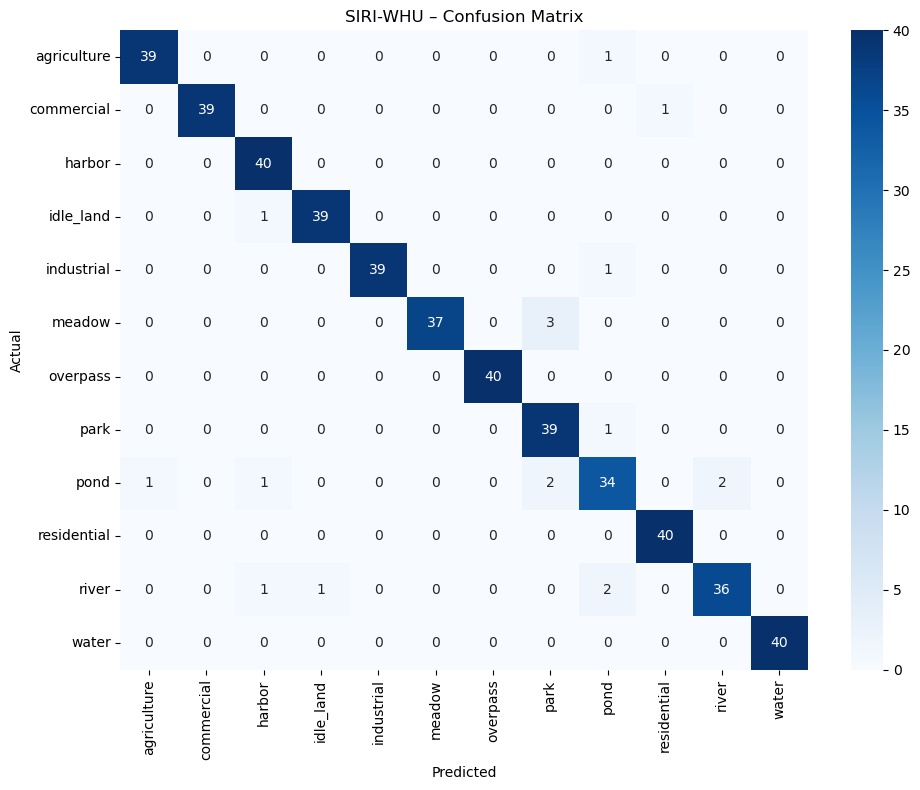

In [26]:
# 6.2.1 – SVM Training & Evaluation (SIRI-WHU)
# Train SVM and plot confusion matrix

print("Training SVM on SIRI-WHU fused features...")

# Record training start time
start_time = datetime.now()

# Initialize and train the SVM classifier with RBF kernel
svm_siri = SVC(kernel="rbf", C=10, gamma="scale", probability=True)
svm_siri.fit(fused_train_siri, y_train_siri)

# Record end time and report training duration
end_time = datetime.now()
log_time(start_time, end_time, label="SIRI-WHU SVM Training")

# Predict on the test set
y_pred_siri = svm_siri.predict(fused_test_siri)

# Evaluate performance
acc_siri = accuracy_score(y_test_siri, y_pred_siri)
f1_siri = f1_score(y_test_siri, y_pred_siri, average="weighted")

print(f"\nAccuracy on SIRI-WHU: {acc_siri:.4f}")
print(f" F1-Score: {f1_siri:.4f}")

# Plot confusion matrix
cm_siri = confusion_matrix(y_test_siri, y_pred_siri)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_siri, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names_siri, yticklabels=class_names_siri)
plt.title("SIRI-WHU – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
# 6.2.2 – SVM Training & Full Evaluation (SIRI-WHU)
# Train SVM and display classification report

print("Training and evaluating SVM on the SIRI-WHU dataset...")

# Record training start time
start_time = datetime.now()

# Initialize SVM with RBF kernel
svm_siri = SVC(kernel="rbf", C=10, gamma="scale", probability=True)
svm_siri.fit(fused_train_siri, y_train_siri)

# Record end time and print duration
end_time = datetime.now()
log_time(start_time, end_time, label="SIRI-WHU SVM Training")

# Prediction and Evaluation
y_pred_siri = svm_siri.predict(fused_test_siri)
acc_siri = accuracy_score(y_test_siri, y_pred_siri)
print(f"\nAccuracy on SIRI-WHU: {acc_siri:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_siri, y_pred_siri, target_names=class_names_siri))



Training and evaluating SVM on the SIRI-WHU dataset...
SIRI-WHU SVM Training completed in 827.19 seconds

Accuracy on SIRI-WHU: 0.9625

Classification Report:
              precision    recall  f1-score   support

 agriculture       0.97      0.97      0.97        40
  commercial       1.00      0.97      0.99        40
      harbor       0.93      1.00      0.96        40
   idle_land       0.97      0.97      0.97        40
  industrial       1.00      0.97      0.99        40
      meadow       1.00      0.93      0.96        40
    overpass       1.00      1.00      1.00        40
        park       0.89      0.97      0.93        40
        pond       0.87      0.85      0.86        40
 residential       0.98      1.00      0.99        40
       river       0.95      0.90      0.92        40
       water       1.00      1.00      1.00        40

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      

In [28]:
# 6.3 – Train and Evaluate SVM Classifier on UC Merced Fused Features (OA only) 

print("Training and evaluating SVM on the UC Merced dataset...")

# Record training start time
start_time = datetime.now()

# Train the Support Vector Machine model using RBF kernel
svm_uc = SVC(kernel="rbf", C=10, gamma="scale")
svm_uc.fit(fused_train_uc, y_train_uc)

# Record end time and report duration
end_time = datetime.now()
log_time(start_time, end_time, label="UC Merced SVM Training")

# Evaluate only overall accuracy
y_pred_uc = svm_uc.predict(fused_test_uc)
acc_uc = accuracy_score(y_test_uc, y_pred_uc)

print(f"\nOverall Accuracy on UC Merced: {acc_uc:.4f}")

Training and evaluating SVM on the UC Merced dataset...
UC Merced SVM Training completed in 144.94 seconds

Overall Accuracy on UC Merced: 0.9786


Training SVM on UC Merced fused features...
UC Merced SVM Training completed in 626.41 seconds

Accuracy on UC Merced: 0.9786
 F1-Score: 0.9785


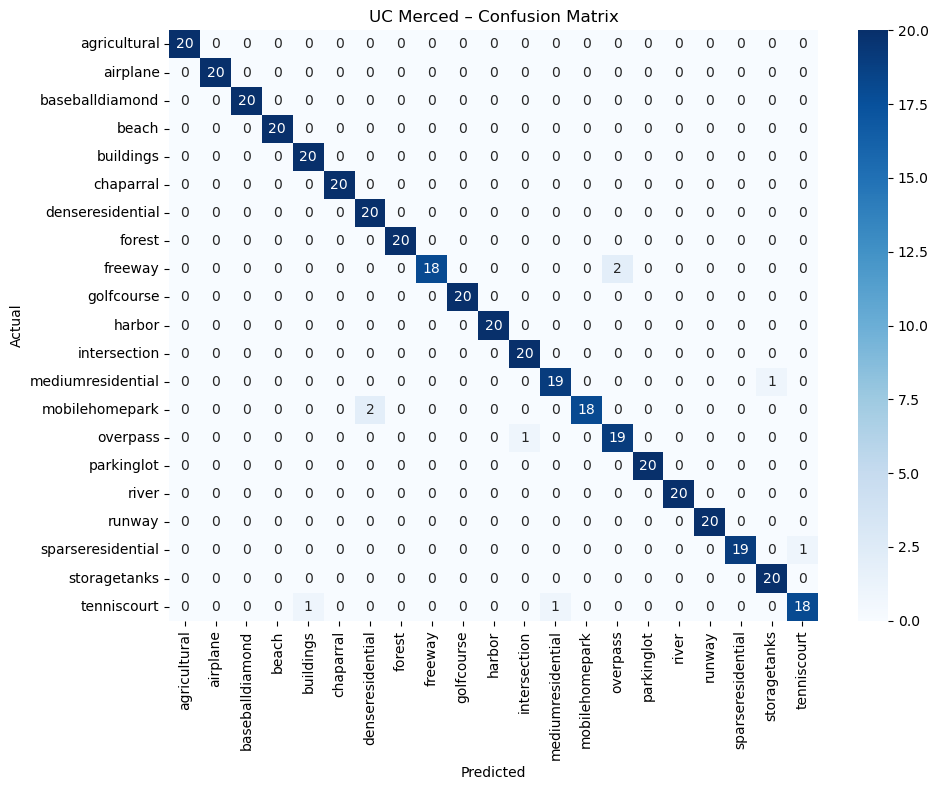

In [29]:
# 6.3.1 – SVM Training & Evaluation (UC Merced)
# Train SVM and display performance metrics

print("Training SVM on UC Merced fused features...")

# Record training start time
start_time = datetime.now()

# Train Support Vector Machine (RBF kernel, probability enabled)
svm_uc = SVC(kernel="rbf", C=10, gamma="scale", probability=True)
svm_uc.fit(fused_train_uc, y_train_uc)

# Record end time and report training duration
end_time = datetime.now()
log_time(start_time, end_time, label="UC Merced SVM Training")

# Evaluate the model
y_pred_uc = svm_uc.predict(fused_test_uc)
acc_uc = accuracy_score(y_test_uc, y_pred_uc)
f1_uc = f1_score(y_test_uc, y_pred_uc, average="weighted")

print(f"\nAccuracy on UC Merced: {acc_uc:.4f}")
print(f" F1-Score: {f1_uc:.4f}")

# Plot confusion matrix
cm_uc = confusion_matrix(y_test_uc, y_pred_uc)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_uc, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names_uc, yticklabels=class_names_uc)
plt.title("UC Merced – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
# 6.3.2 – SVM Training & Full Evaluation (UC Merced)
# Train SVM and display classification report

print("Training and evaluating SVM on the UC Merced dataset...")

# Record training start time
start_time = datetime.now()

# Train Support Vector Machine with RBF kernel
svm_uc = SVC(kernel="rbf", C=10, gamma="scale", probability=True)
svm_uc.fit(fused_train_uc, y_train_uc)

# Record end time and report training duration
end_time = datetime.now()
log_time(start_time, end_time, label="UC Merced SVM Training")

# Evaluate the model
y_pred_uc = svm_uc.predict(fused_test_uc)
acc_uc = accuracy_score(y_test_uc, y_pred_uc)

print(f"\nAccuracy on UC Merced: {acc_uc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_uc, y_pred_uc, target_names=class_names_uc))



Training and evaluating SVM on the UC Merced dataset...
UC Merced SVM Training completed in 333.93 seconds

Accuracy on UC Merced: 0.9786

Classification Report:
                   precision    recall  f1-score   support

     agricultural       1.00      1.00      1.00        20
         airplane       1.00      1.00      1.00        20
  baseballdiamond       1.00      1.00      1.00        20
            beach       1.00      1.00      1.00        20
        buildings       0.95      1.00      0.98        20
        chaparral       1.00      1.00      1.00        20
 denseresidential       0.91      1.00      0.95        20
           forest       1.00      1.00      1.00        20
          freeway       1.00      0.90      0.95        20
       golfcourse       1.00      1.00      1.00        20
           harbor       1.00      1.00      1.00        20
     intersection       0.95      1.00      0.98        20
mediumresidential       0.95      0.95      0.95        20
   mobileho

In [31]:
# 6.4 – Save Trained SVM Models for SIRI-WHU and UC Merced

# Create directory to store SVM models
SVM_MODEL_DIR = MODELS_DIR / "svm"
SVM_MODEL_DIR.mkdir(parents=True, exist_ok=True)

# Save the SIRI-WHU SVM model
siri_model_path = SVM_MODEL_DIR / "svm_model_siri_whu.pkl"
joblib.dump((svm_siri, class_names_siri), siri_model_path)
print(f"Model saved: {siri_model_path.name}")

# Save the UC Merced SVM model
uc_model_path = SVM_MODEL_DIR / "svm_model_uc_merced.pkl"
joblib.dump((svm_uc, class_names_uc), uc_model_path)
print(f"Model saved: {uc_model_path.name}")

Model saved: svm_model_siri_whu.pkl
Model saved: svm_model_uc_merced.pkl


 Final Test Accuracy 
-----------------------------------
TriDCCS-SVM(SIRI-WHU): 0.9625
TriDCCS-SVM(UC Merced): 0.9786


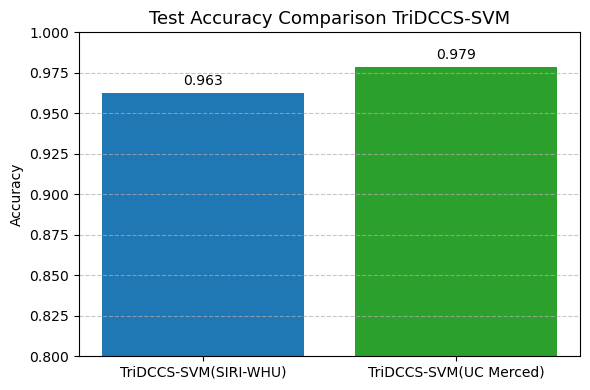

In [32]:
# 6.5 – Final Test Accuracy Summary
# Compare final SVM accuracies for SIRI-WHU & UC Merced

# Accuracy values
models = ["TriDCCS-SVM(SIRI-WHU)", "TriDCCS-SVM(UC Merced)"]
accuracies = [acc_siri, acc_uc]

# Display raw numbers
print(" Final Test Accuracy \n" + "-"*35)
for model, acc in zip(models, accuracies):
    print(f"{model:<20}: {acc:.4f}")

# Plot simple bar chart for visual comparison
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['#1f77b4', '#2ca02c'])  # blue, green
plt.ylim(0.8, 1.0)
plt.title("Test Accuracy Comparison TriDCCS-SVM", fontsize=13)
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f"{height:.3f}", ha='center')

plt.tight_layout()
plt.show()


SIRI-WHU – Per-Class Metrics Table


Class  Accuracy  Precision  Recall  F1-Score
0   agriculture     0.975     0.9750   0.975    0.9750
1    commercial     0.975     1.0000   0.975    0.9873
2        harbor     1.000     0.9302   1.000    0.9639
3     idle_land     0.975     0.9750   0.975    0.9750
4    industrial     0.975     1.0000   0.975    0.9873
5        meadow     0.925     1.0000   0.925    0.9610
6      overpass     1.000     1.0000   1.000    1.0000
7          park     0.975     0.8864   0.975    0.9286
8          pond     0.850     0.8718   0.850    0.8608
9   residential     1.000     0.9756   1.000    0.9877
10        river     0.900     0.9474   0.900    0.9231
11        water     1.000     1.0000   1.000    1.0000

 Table saved to: C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\results\siri_per_class_metrics.csv and .xlsx
 Bar chart saved to: C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\siri-whu_per_class_metrics.png


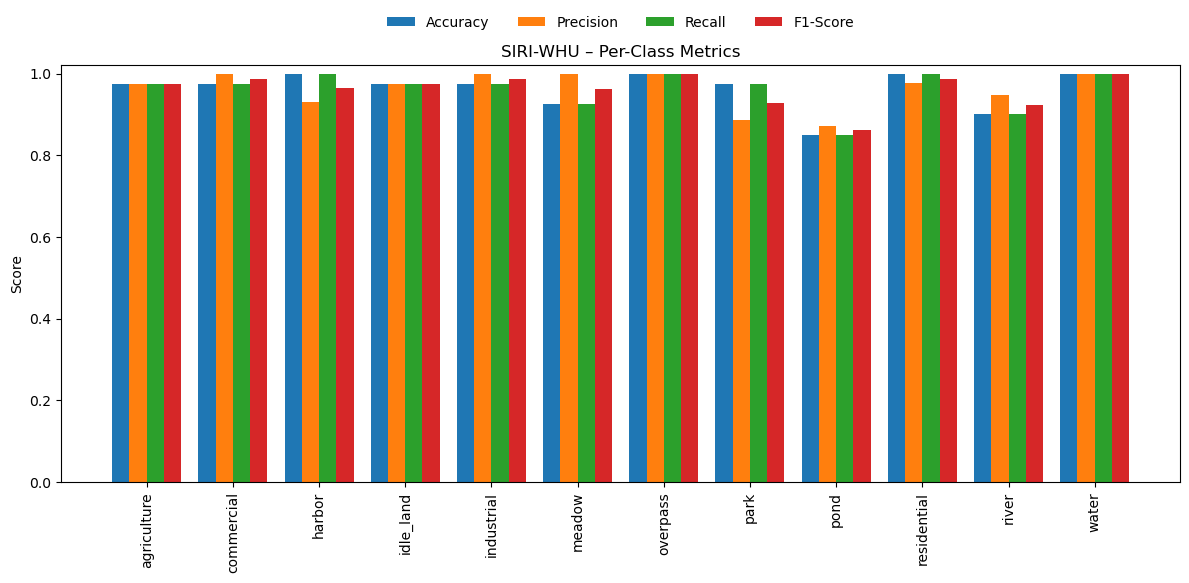


UC Merced – Per-Class Metrics Table


Class  Accuracy  Precision  Recall  F1-Score
0        agricultural      1.00     1.0000    1.00    1.0000
1            airplane      1.00     1.0000    1.00    1.0000
2     baseballdiamond      1.00     1.0000    1.00    1.0000
3               beach      1.00     1.0000    1.00    1.0000
4           buildings      1.00     0.9524    1.00    0.9756
5           chaparral      1.00     1.0000    1.00    1.0000
6    denseresidential      1.00     0.9091    1.00    0.9524
7              forest      1.00     1.0000    1.00    1.0000
8             freeway      0.90     1.0000    0.90    0.9474
9          golfcourse      1.00     1.0000    1.00    1.0000
10             harbor      1.00     1.0000    1.00    1.0000
11       intersection      1.00     0.9524    1.00    0.9756
12  mediumresidential      0.95     0.9500    0.95    0.9500
13     mobilehomepark      0.90     1.0000    0.90    0.9474
14           overpass      0.95     0.9048    0.95    0.9268
15         parkinglot      1.00     1.0000    1.00    1.0000
16              river      1.00     1.0000    1.00    1.0000
17             runway      1.00     1.0000    1.00    1.0000
18  sparseresidential      0.95     1.0000    0.95    0.9744
19       storagetanks      1.00     0.9524    1.00    0.9756
20        tenniscourt      0.90     0.9474    0.90    0.9231

 Table saved to: C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\results\uc_per_class_metrics.csv and .xlsx
 Bar chart saved to: C:\Users\User\Desktop\implementation\implementation-code-tridccs-svm\outputs\visualizations\uc_merced_per_class_metrics.png


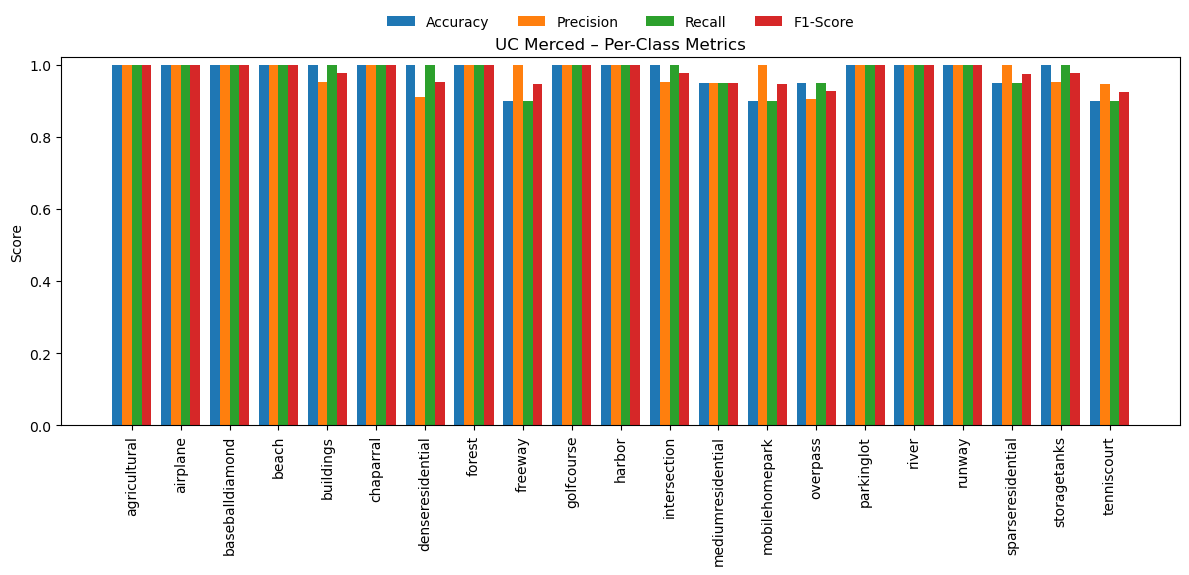

In [33]:
# 6.6 – Per-Class Evaluation (Table + Bar Chart)
# Summarize accuracy, precision, recall, and F1 per class

def evaluate_per_class(y_true, y_pred, class_names, dataset_name, save_path=None, plot_save_dir=None):
    """
    Display and save per-class accuracy, precision, recall, and F1-score as table and bar chart.
    """
    acc = (y_true == y_pred).astype(int)
    acc_per_class = [np.mean(acc[y_true == i]) for i in range(len(class_names))]
    precision = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

    # Create a DataFrame of the metrics
    df = pd.DataFrame({
        "Class": class_names,
        "Accuracy": acc_per_class,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }).round(4)

    print(f"\n{dataset_name} – Per-Class Metrics Table")
    display(df)


    # Save table if path provided
    if save_path:
        df.to_csv(save_path.with_suffix(".csv"), index=False)
        df.to_excel(save_path.with_suffix(".xlsx"), index=False)
        print(f" Table saved to: {save_path}.csv and .xlsx")

    # Plot bar chart
    x = np.arange(len(class_names))
    width = 0.2
    plt.figure(figsize=(12, 6))
    for i, metric in enumerate(["Accuracy", "Precision", "Recall", "F1-Score"]):
        plt.bar(x + i*width - 1.5*width, df[metric], width=width, label=metric)

    plt.xticks(x, class_names, rotation=90)
    plt.ylim(0, 1.02)
    plt.ylabel("Score")
    plt.title(f"{dataset_name} – Per-Class Metrics")
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False)
    plt.tight_layout()

    # Save plot if plot_save_dir provided
    if plot_save_dir:
        plot_file = plot_save_dir / f"{dataset_name.replace(' ', '_').lower()}_per_class_metrics.png"
        plt.savefig(plot_file)
        print(f" Bar chart saved to: {plot_file}")

    plt.show()
    plt.close()


# Apply for SIRI-WHU
evaluate_per_class(
    y_test_siri, y_pred_siri, class_names_siri,
    dataset_name="SIRI-WHU",
    save_path=RESULTS_DIR / "siri_per_class_metrics",
    plot_save_dir=VISUALS_DIR
)

# Apply for UC Merced
evaluate_per_class(
    y_test_uc, y_pred_uc, class_names_uc,
    dataset_name="UC Merced",
    save_path=RESULTS_DIR / "uc_per_class_metrics",
    plot_save_dir=VISUALS_DIR
)


In [34]:
# 6.7 – Index and Functionality Overview

summary = """
#  TriDCCS-SVM Notebook – Final Summary

---

####  1. Environment Setup and Initialization
- **1.1** – Installing Required Python Packages  
- **1.2** – Import Required Libraries  
- **1.3** – Print Library Versions and Platform Information  
- **1.4** – Display System Specifications (CPU, RAM, and GPU if available)  
- **1.5** – Log Execution Time for Any Processing Step  
- **1.6** – Define and Create Core Project Directories  

####  2. Data Loading and Inspection
- **2.1** – Load Images from Class Subfolders into Arrays  
- **2.2** – Remove Invalid Images from Dataset  
- **2.3** – Visualize Class Distribution with Pie and Bar Charts  
- **2.4** – Visualize Image Size Distribution (Width & Height)  
- **2.5** – Display One Sample Image per Class  
- **2.6** – Check for Corrupt or Blank Images  

####  3. Data Splitting
- **3.1** – Split SIRI-WHU and UC Merced Datasets into Train/Test Sets  
- **3.2** – Summarize Class Distribution After Splitting  

####  4. Model Preparation
- **4.1** – Load Pretrained CNN Models (Without Fully Connected Layers)  
- **4.2** – Summarize CNN Feature Dimensions  
- **4.3** – Visualize Network Fusion Architecture  
- **4.4** – Document Preprocessing Methods for Each CNN  

####  5. Feature Extraction and Analysis
- **5.1** – Feature Extraction and Scaling for Each CNN and Dataset Split  
- **5.2** – Feature Correlation Analysis Between CNNs  
- **5.3** – Feature Heatmap Visualization  
- **5.4** – Feature Distribution (Boxplot + Histogram)  
- **5.5** – Save Extracted Features with joblib  

####  6. Classification and Evaluation
- **6.1** – Load, Fuse, and Normalize Features from Saved Pickle Files  
- **6.2 → 6.3.2** – Train and Evaluate SVM Classifiers (SIRI-WHU & UC Merced)  
- **6.4** – Save Trained SVM Models  
- **6.5** – Final Test Accuracy Summary  
- **6.6** – Per-Class Evaluation: Metrics Table + Bar Plot  
- **6.7** – Final Summary Cell (this one)

---

###  Completion Status:  
 All cells executed successfully  
 Features saved and models exported  
 Results visualized in tables and charts 

"""

display(Markdown(summary))



#  TriDCCS-SVM Notebook – Final Summary

---

####  1. Environment Setup and Initialization
- **1.1** – Installing Required Python Packages  
- **1.2** – Import Required Libraries  
- **1.3** – Print Library Versions and Platform Information  
- **1.4** – Display System Specifications (CPU, RAM, and GPU if available)  
- **1.5** – Log Execution Time for Any Processing Step  
- **1.6** – Define and Create Core Project Directories  

####  2. Data Loading and Inspection
- **2.1** – Load Images from Class Subfolders into Arrays  
- **2.2** – Remove Invalid Images from Dataset  
- **2.3** – Visualize Class Distribution with Pie and Bar Charts  
- **2.4** – Visualize Image Size Distribution (Width & Height)  
- **2.5** – Display One Sample Image per Class  
- **2.6** – Check for Corrupt or Blank Images  

####  3. Data Splitting
- **3.1** – Split SIRI-WHU and UC Merced Datasets into Train/Test Sets  
- **3.2** – Summarize Class Distribution After Splitting  

####  4. Model Preparation
- **4.1** – Load Pretrained CNN Models (Without Fully Connected Layers)  
- **4.2** – Summarize CNN Feature Dimensions  
- **4.3** – Visualize Network Fusion Architecture  
- **4.4** – Document Preprocessing Methods for Each CNN  

####  5. Feature Extraction and Analysis
- **5.1** – Feature Extraction and Scaling for Each CNN and Dataset Split  
- **5.2** – Feature Correlation Analysis Between CNNs  
- **5.3** – Feature Heatmap Visualization  
- **5.4** – Feature Distribution (Boxplot + Histogram)  
- **5.5** – Save Extracted Features with joblib  

####  6. Classification and Evaluation
- **6.1** – Load, Fuse, and Normalize Features from Saved Pickle Files  
- **6.2 → 6.3.2** – Train and Evaluate SVM Classifiers (SIRI-WHU & UC Merced)  
- **6.4** – Save Trained SVM Models  
- **6.5** – Final Test Accuracy Summary  
- **6.6** – Per-Class Evaluation: Metrics Table + Bar Plot  
- **6.7** – Final Summary Cell (this one)

---

###  Completion Status:  
 All cells executed successfully  
 Features saved and models exported  
 Results visualized in tables and charts 

